In [1]:
!pip install -q "monai[all]"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.5/266.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 MB 21.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 24.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 63.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 29.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 58.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 84.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━

In [ ]:
# import os
# import random
# import nibabel as nib
# import numpy as np
# import matplotlib.pyplot as plt
# from monai.transforms import (
#     Compose, LoadImaged, EnsureChannelFirstd, Spacingd, ScaleIntensityRanged,
#     CropForegroundd, Resized, ToTensord, SpatialCropd
# )
# from monai.data import Dataset, DataLoader

# # مسارات الداتاسيت
# data_dir = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
# output_dir = "/kaggle/working/processed"
# os.makedirs(output_dir, exist_ok=True)

# # قايمة الحالات
# patient_list = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d)) and not d.endswith(".csv")])

# # إنشاء فولدرات لكل مريض
# for patient in patient_list:
#     os.makedirs(os.path.join(output_dir, patient), exist_ok=True)

# # إعداد قايمة البيانات (FLAIR, T2, T1CE)
# data_dicts = []
# skipped_patients = []
# for patient in patient_list:
#     flair_path = os.path.join(data_dir, patient, f"{patient}_flair.nii")
#     t2_path = os.path.join(data_dir, patient, f"{patient}_t2.nii")
#     t1ce_path = os.path.join(data_dir, patient, f"{patient}_t1ce.nii")
#     try:
#         # فحص وجود الملفات
#         if not (os.path.exists(flair_path) and os.path.exists(t2_path) and os.path.exists(t1ce_path)):
#             skipped_patients.append((patient, "Missing file(s)"))
#             continue
#         # فحص تحميل الملفات
#         nib.load(flair_path)
#         nib.load(t2_path)
#         nib.load(t1ce_path)
#         data_dicts.append({
#             "flair": flair_path,
#             "t2": t2_path,
#             "t1ce": t1ce_path,
#         })
#     except Exception as e:
#         skipped_patients.append((patient, f"Failed to load files: {str(e)}"))
#         continue

# # تعريف التحويلات
# transforms = Compose([
#     LoadImaged(keys=["flair", "t2", "t1ce"]),
#     EnsureChannelFirstd(keys=["flair", "t2", "t1ce"]),
#     Spacingd(keys=["flair", "t2", "t1ce"], pixdim=(1.0, 1.0, 1.0), mode="bilinear"),
#     ScaleIntensityRanged(keys=["flair", "t2", "t1ce"], a_min=0, a_max=4000, b_min=0, b_max=1, clip=True),
#     CropForegroundd(keys=["flair", "t2", "t1ce"], source_key="flair", allow_smaller=False),
#     Resized(keys=["flair", "t2", "t1ce"], spatial_size=(128, 128, 155)),
#     SpatialCropd(keys=["flair", "t2", "t1ce"], roi_start=[0, 0, 30], roi_end=[128, 128, 126]),  # 128x128x96
#     ToTensord(keys=["flair", "t2", "t1ce"])
# ])

# # إعداد الداتاسيت والـ DataLoader
# dataset = Dataset(data=data_dicts, transform=transforms)
# dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=2)

# # معالجة وحفظ الصور
# processed_count = 0
# display_patients = patient_list[:2]  # أول اتنين بيشنت للعرض
# display_images = []

# for i, data in enumerate(dataloader):
#     if i >= len(data_dicts):
#         break
#     patient_id = data_dicts[i]["flair"].split("/")[-2]  # استخراج patient_id من المسار
    
#     patient_output_dir = os.path.join(output_dir, patient_id)
    
#     flair, t2, t1ce = data["flair"][0], data["t2"][0], data["t1ce"][0]
    
#     # تحويل إلى NumPy لحفظها
#     flair_np = flair.numpy().squeeze()
#     t2_np = t2.numpy().squeeze()
#     t1ce_np = t2.numpy().squeeze()
    
#     # حفظ الصور كـ NIFTI
#     for modality, img in [("flair", flair_np), ("t2", t2_np), ("t1ce", t1ce_np)]:
#         output_path = os.path.join(patient_output_dir, f"{modality}.nii.gz")
#         nii_img = nib.Nifti1Image(img, affine=np.eye(4))
#         nib.save(nii_img, output_path)
    
#     # تخزين الصور للعرض
#     if patient_id in display_patients:
#         display_images.append({
#             "patient_id": patient_id,
#             "flair": flair_np[:, :, 48],
#             "t2": t2_np[:, :, 48],
#             "t1ce": t1ce_np[:, :, 48]
#         })
    
#     processed_count += 1

# # عرض الصور
# for patient_data in display_images:
#     fig, axes = plt.subplots(1, 3, figsize=(16, 4))
#     axes[0].imshow(patient_data["flair"], cmap="gray")
#     axes[0].set_title("FLAIR")
#     axes[0].axis("off")
#     axes[1].imshow(patient_data["t2"], cmap="gray")
#     axes[1].set_title("T2")
#     axes[1].axis("off")
#     axes[2].imshow(patient_data["t1ce"], cmap="gray")
#     axes[2].set_title("T1CE")
#     axes[2].axis("off")
#     plt.show()

# # طباعة النتائج
# print(f"Processed {processed_count} patients successfully")
# if skipped_patients:
#     print("Skipped patients:")
#     for patient, reason in skipped_patients:
#         print(f"Patient {patient}: {reason}")
# if processed_count < len(patient_list):
#     print(f"Warning: Expected to process {len(patient_list)} patients, but only processed {processed_count}")

In [3]:
# import os
# import random
# import nibabel as nib
# import numpy as np
# import matplotlib.pyplot as plt
# from monai.transforms import (
#     Compose, LoadImaged, EnsureChannelFirstd, Spacingd, ScaleIntensityRanged,
#     CropForegroundd, Resized, ToTensord, SpatialCropd
# )
# from monai.data import Dataset, DataLoader

# # Dataset paths
# train_data_dir = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
# val_data_dir = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData"
# output_dir = "/kaggle/working/processed"
# train_output_dir = os.path.join(output_dir, "train")
# val_output_dir = os.path.join(output_dir, "val")
# os.makedirs(train_output_dir, exist_ok=True)
# os.makedirs(val_output_dir, exist_ok=True)

# # List of patients for training and validation
# train_patient_list = sorted([d for d in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, d)) and not d.endswith(".csv")])
# val_patient_list = sorted([d for d in os.listdir(val_data_dir) if os.path.isdir(os.path.join(val_data_dir, d)) and not d.endswith(".csv")])

# # Create folders for each patient in training and validation
# for patient in train_patient_list:
#     os.makedirs(os.path.join(train_output_dir, patient), exist_ok=True)
# for patient in val_patient_list:
#     os.makedirs(os.path.join(val_output_dir, patient), exist_ok=True)

# # Prepare data dictionaries (FLAIR, T2, T1CE) for training and validation
# data_dicts = []
# skipped_patients = []
# for data_dir, patient_list, data_type, out_dir in [
#     (train_data_dir, train_patient_list, "train", train_output_dir),
#     (val_data_dir, val_patient_list, "val", val_output_dir)
# ]:
#     for patient in patient_list:
#         flair_path = os.path.join(data_dir, patient, f"{patient}_flair.nii")
#         t2_path = os.path.join(data_dir, patient, f"{patient}_t2.nii")
#         t1ce_path = os.path.join(data_dir, patient, f"{patient}_t1ce.nii")
#         try:
#             # Check if files exist
#             if not (os.path.exists(flair_path) and os.path.exists(t2_path) and os.path.exists(t1ce_path)):
#                 skipped_patients.append((patient, f"Missing files in {data_type}"))
#                 continue
#             # Verify file loading
#             nib.load(flair_path)
#             nib.load(t2_path)
#             nib.load(t1ce_path)
#             data_dicts.append({
#                 "flair": flair_path,
#                 "t2": t2_path,
#                 "t1ce": t1ce_path,
#                 "data_type": data_type,
#                 "patient_id": patient,
#                 "output_dir": out_dir
#             })
#         except Exception as e:
#             skipped_patients.append((patient, f"Failed to load files in {data_type}: {str(e)}"))
#             continue

# # Define transformations
# transforms = Compose([
#     LoadImaged(keys=["flair", "t2", "t1ce"]),
#     EnsureChannelFirstd(keys=["flair", "t2", "t1ce"]),
#     Spacingd(keys=["flair", "t2", "t1ce"], pixdim=(1.0, 1.0, 1.0), mode="bilinear"),
#     ScaleIntensityRanged(keys=["flair", "t2", "t1ce"], a_min=0, a_max=4000, b_min=0, b_max=1, clip=True),
#     CropForegroundd(keys=["flair", "t2", "t1ce"], source_key="flair", allow_smaller=False),
#     Resized(keys=["flair", "t2", "t1ce"], spatial_size=(128, 128, 155)),
#     SpatialCropd(keys=["flair", "t2", "t1ce"], roi_start=[0, 0, 30], roi_end=[128, 128, 126]),  # 128x128x96
#     ToTensord(keys=["flair", "t2", "t1ce"])
# ])

# # Setup dataset and DataLoader
# dataset = Dataset(data=data_dicts, transform=transforms)
# dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=2)

# # Process and save images
# processed_count = {"train": 0, "val": 0}
# display_patients = train_patient_list[:1] + val_patient_list[:1]  # First patient from training and validation
# display_images = []

# for i, data in enumerate(dataloader):
#     if i >= len(data_dicts):
#         break
#     patient_id = data_dicts[i]["patient_id"]
#     data_type = data_dicts[i]["data_type"]
#     patient_output_dir = os.path.join(data_dicts[i]["output_dir"], patient_id)
    
#     flair, t2, t1ce = data["flair"][0], data["t2"][0], data["t1ce"][0]
    
#     # Convert to NumPy for saving
#     flair_np = flair.numpy().squeeze()
#     t2_np = t2.numpy().squeeze()
#     t1ce_np = t1ce.numpy().squeeze()
    
#     # Save images as NIFTI
#     for modality, img in [("flair", flair_np), ("t2", t2_np), ("t1ce", t1ce_np)]:
#         output_path = os.path.join(patient_output_dir, f"{modality}.nii.gz")
#         nii_img = nib.Nifti1Image(img, affine=np.eye(4))
#         nib.save(nii_img, output_path)
    
#     # Store images for display
#     if patient_id in display_patients:
#         display_images.append({
#             "patient_id": patient_id,
#             "data_type": data_type,
#             "flair": flair_np[:, :, 48],
#             "t2": t2_np[:, :, 48],
#             "t1ce": t1ce_np[:, :, 48]
#         })
    
#     processed_count[data_type] += 1

# # Display images
# for patient_data in display_images:
#     fig, axes = plt.subplots(1, 3, figsize=(16, 4))
#     axes[0].imshow(patient_data["flair"], cmap="gray")
#     axes[0].set_title(f"FLAIR ({patient_data['data_type']}: {patient_data['patient_id']})")
#     axes[0].axis("off")
#     axes[1].imshow(patient_data["t2"], cmap="gray")
#     axes[1].set_title(f"T2 ({patient_data['data_type']}: {patient_data['patient_id']})")
#     axes[1].axis("off")
#     axes[2].imshow(patient_data["t1ce"], cmap="gray")
#     axes[2].set_title(f"T1CE ({patient_data['data_type']}: {patient_data['patient_id']})")
#     axes[2].axis("off")
#     plt.savefig(f"{patient_data['data_type']}_{patient_data['patient_id']}_display.png")
#     plt.close()

# # Print results
# print(f"Processed {processed_count['train']} training patients successfully")
# print(f"Processed {processed_count['val']} validation patients successfully")
# if skipped_patients:
#     print("Skipped patients:")
#     for patient, reason in skipped_patients:
#         print(f"Patient {patient}: {reason}")
# if processed_count["train"] < len(train_patient_list):
#     print(f"Warning: Expected to process {len(train_patient_list)} training patients, but only processed {processed_count['train']}")
# if processed_count["val"] < len(val_patient_list):
#     print(f"Warning: Expected to process {len(val_patient_list)} validation patients, but only processed {processed_count['val']}")

<frozen importlib._bootstrap_external>:1241: FutureWarning: The cuda.cudart module is deprecated and will be removed in a future release, please switch to use the cuda.bindings.runtime module instead.
2025-05-13 12:30:50.371057: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747139450.575348      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747139450.636446      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Processed 369 training patients successfully
Processed 125 validation patients successfully


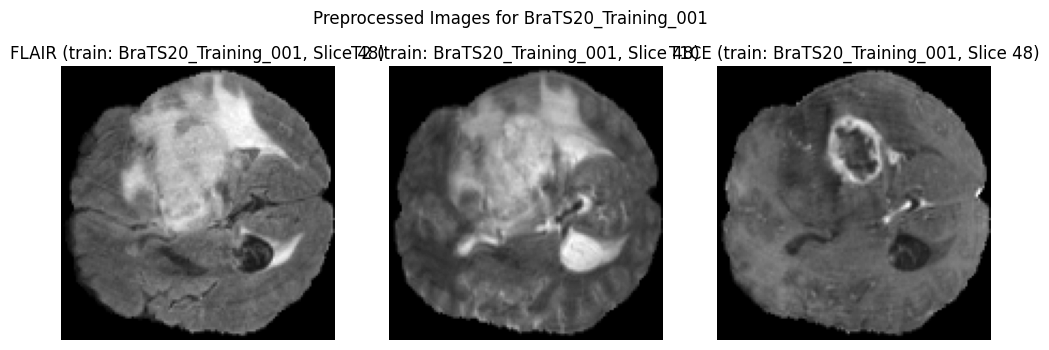

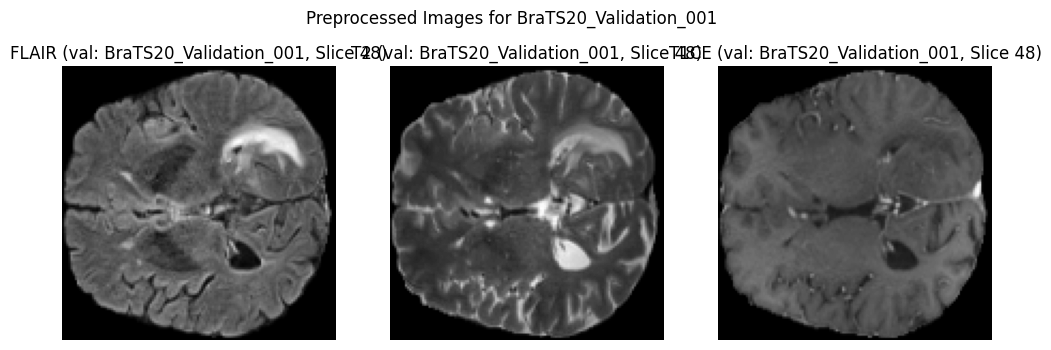

Processed 369 training patients successfully
Processed 125 validation patients successfully


In [3]:
import os
import random
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, Spacingd, ScaleIntensityRanged,
    CropForegroundd, Resized, ToTensord, SpatialCropd
)
from monai.data import Dataset, DataLoader

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define dataset paths
train_data_dir = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
val_data_dir = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData"
output_dir = "/kaggle/working/processed"
train_output_dir = os.path.join(output_dir, "train")
val_output_dir = os.path.join(output_dir, "val")
os.makedirs(train_output_dir, exist_ok=True)
os.makedirs(val_output_dir, exist_ok=True)

# Get list of patients for training and validation
train_patient_list = sorted([d for d in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, d)) and not d.endswith(".csv")])
val_patient_list = sorted([d for d in os.listdir(val_data_dir) if os.path.isdir(os.path.join(val_data_dir, d)) and not d.endswith(".csv")])

# Create folders for each patient in training and validation
for patient in train_patient_list:
    os.makedirs(os.path.join(train_output_dir, patient), exist_ok=True)
for patient in val_patient_list:
    os.makedirs(os.path.join(val_output_dir, patient), exist_ok=True)

# Prepare data dictionaries for FLAIR, T2, T1CE
data_dicts = []
skipped_patients = []
for data_dir, patient_list, data_type, out_dir in [
    (train_data_dir, train_patient_list, "train", train_output_dir),
    (val_data_dir, val_patient_list, "val", val_output_dir)
]:
    for patient in patient_list:
        flair_path = os.path.join(data_dir, patient, f"{patient}_flair.nii")
        t2_path = os.path.join(data_dir, patient, f"{patient}_t2.nii")
        t1ce_path = os.path.join(data_dir, patient, f"{patient}_t1ce.nii")
        try:
            # Check if files exist
            if not (os.path.exists(flair_path) and os.path.exists(t2_path) and os.path.exists(t1ce_path)):
                skipped_patients.append((patient, f"Missing files in {data_type}"))
                continue
            # Verify file loading
            nib.load(flair_path)
            nib.load(t2_path)
            nib.load(t1ce_path)
            data_dicts.append({
                "flair": flair_path,
                "t2": t2_path,
                "t1ce": t1ce_path,
                "data_type": data_type,
                "patient_id": patient,
                "output_dir": out_dir
            })
        except Exception as e:
            skipped_patients.append((patient, f"Failed to load files in {data_type}: {str(e)}"))
            continue

# Define transformations
transforms = Compose([
    LoadImaged(keys=["flair", "t2", "t1ce"]),
    EnsureChannelFirstd(keys=["flair", "t2", "t1ce"]),
    Spacingd(keys=["flair", "t2", "t1ce"], pixdim=(1.0, 1.0, 1.0), mode="bilinear"),
    ScaleIntensityRanged(keys=["flair", "t2", "t1ce"], a_min=0, a_max=4000, b_min=0, b_max=1, clip=True),
    CropForegroundd(keys=["flair", "t2", "t1ce"], source_key="flair", allow_smaller=False),
    Resized(keys=["flair", "t2", "t1ce"], spatial_size=(128, 128, 155), mode="trilinear"),
    SpatialCropd(keys=["flair", "t2", "t1ce"], roi_start=[0, 0, 30], roi_end=[128, 128, 126]),  # Output: 128x128x96
    ToTensord(keys=["flair", "t2", "t1ce"])
])

# Setup dataset and DataLoader
dataset = Dataset(data=data_dicts, transform=transforms)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=2)

# Process and save images
processed_count = {"train": 0, "val": 0}
display_patients = train_patient_list[:1] + val_patient_list[:1]  # First patient from training and validation
display_images = []

for i, data in enumerate(dataloader):
    if i >= len(data_dicts):
        break
    patient_id = data_dicts[i]["patient_id"]
    data_type = data_dicts[i]["data_type"]
    patient_output_dir = os.path.join(data_dicts[i]["output_dir"], patient_id)
    
    flair, t2, t1ce = data["flair"][0], data["t2"][0], data["t1ce"][0]
    
    # Convert to NumPy for saving and display
    flair_np = flair.numpy().squeeze()
    t2_np = t2.numpy().squeeze()
    t1ce_np = t1ce.numpy().squeeze()
    
    # Display images before saving
    if patient_id in display_patients:
        mid_slice = 48  # Middle slice for visualization
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        axes[0].imshow(flair_np[:, :, mid_slice], cmap="gray")
        axes[0].set_title(f"FLAIR ({data_type}: {patient_id}, Slice {mid_slice})")
        axes[0].axis("off")
        axes[1].imshow(t2_np[:, :, mid_slice], cmap="gray")
        axes[1].set_title(f"T2 ({data_type}: {patient_id}, Slice {mid_slice})")
        axes[1].axis("off")
        axes[2].imshow(t1ce_np[:, :, mid_slice], cmap="gray")
        axes[2].set_title(f"T1CE ({data_type}: {patient_id}, Slice {mid_slice})")
        axes[2].axis("off")
        plt.suptitle(f"Preprocessed Images for {patient_id}")
        plt.show()
        plt.close()
    
    # Save images as NIFTI
    for modality, img in [("flair", flair_np), ("t2", t2_np), ("t1ce", t1ce_np)]:
        output_path = os.path.join(patient_output_dir, f"{modality}.nii.gz")
        nii_img = nib.Nifti1Image(img, affine=np.eye(4))
        nib.save(nii_img, output_path)
    
    # Store images for logging
    if patient_id in display_patients:
        display_images.append({
            "patient_id": patient_id,
            "data_type": data_type,
            "flair": flair_np[:, :, 48],
            "t2": t2_np[:, :, 48],
            "t1ce": t1ce_np[:, :, 48]
        })
    
    processed_count[data_type] += 1

# Print results
print(f"Processed {processed_count['train']} training patients successfully")
print(f"Processed {processed_count['val']} validation patients successfully")
if skipped_patients:
    print("Skipped patients:")
    for patient, reason in skipped_patients:
        print(f"Patient {patient}: {reason}")
if processed_count["train"] < len(train_patient_list):
    print(f"Warning: Expected to process {len(train_patient_list)} training patients, but only processed {processed_count['train']}")
if processed_count["val"] < len(val_patient_list):
    print(f"Warning: Expected to process {len(val_patient_list)} validation patients, but only processed {processed_count['val']}")

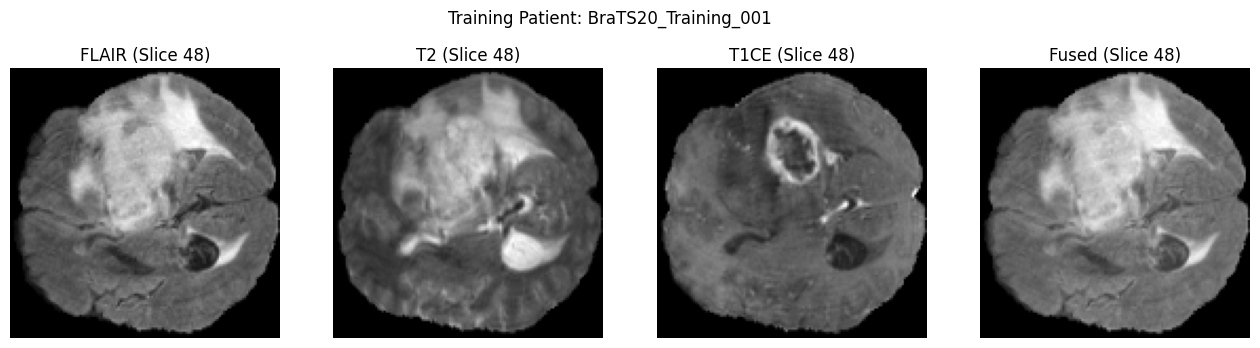

Metrics for training Patient BraTS20_Training_001:
MSE: 0.0144
PSNR: 18.4095
SSIM: 0.8420
Entropy: 13.1991
MI: 1.3430



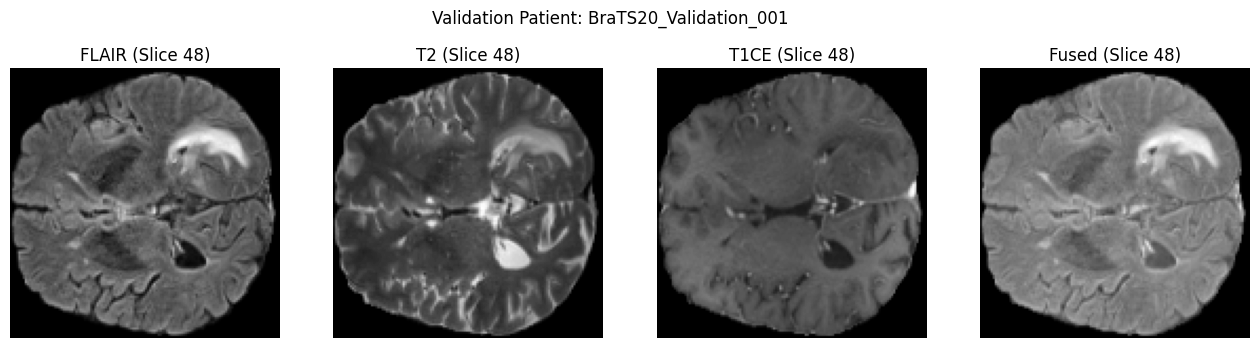

Metrics for validation Patient BraTS20_Validation_001:
MSE: 0.0042
PSNR: 23.7704
SSIM: 0.8841
Entropy: 13.5132
MI: 1.0737

Fused 494 patients successfully
Training patients processed: 369
Validation patients processed: 125


In [7]:
import os
import random
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage.transform import pyramid_gaussian, resize
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
from skimage.measure import shannon_entropy
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, ToTensord, Resized, SpatialCropd
)
from monai.data import Dataset, DataLoader
import glob
import logging

# Set up logging
logging.basicConfig(filename='/kaggle/working/fusion.log', level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define directories
train_dir = "/kaggle/working/processed/train"
val_dir = "/kaggle/working/processed/val"
output_dir = "/kaggle/working/fused"
vis_dir = "/kaggle/working/visualizations"
os.makedirs(os.path.join(output_dir, "training"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "validation"), exist_ok=True)
os.makedirs(vis_dir, exist_ok=True)

# Get patient lists
train_patients = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])
val_patients = sorted([d for d in os.listdir(val_dir) if os.path.isdir(os.path.join(val_dir, d))])

# Create folders for all patients
for patient in train_patients:
    os.makedirs(os.path.join(output_dir, "training", patient), exist_ok=True)
for patient in val_patients:
    os.makedirs(os.path.join(output_dir, "validation", patient), exist_ok=True)

# Prepare data dictionaries
data_dicts = []
skipped_patients = []
for patient in train_patients:
    flair_files = glob.glob(os.path.join(train_dir, patient, "flair.nii*"))
    t2_files = glob.glob(os.path.join(train_dir, patient, "t2.nii*"))
    t1ce_files = glob.glob(os.path.join(train_dir, patient, "t1ce.nii*"))
    missing_files = []
    if not flair_files:
        missing_files.append("FLAIR")
    if not t2_files:
        missing_files.append("T2")
    if not t1ce_files:
        missing_files.append("T1CE")
    if missing_files:
        skipped_patients.append((patient, f"Missing file(s): {', '.join(missing_files)}"))
        logging.warning(f"Patient {patient}: Missing file(s): {', '.join(missing_files)}")
        continue
    flair_path = flair_files[0]
    t2_path = t2_files[0]
    t1ce_path = t1ce_files[0]
    try:
        nib.load(flair_path)
        nib.load(t2_path)
        nib.load(t1ce_path)
        data_dicts.append({
            "flair": flair_path,
            "t2": t2_path,
            "t1ce": t1ce_path,
            "patient_id": patient,
            "type": "training"
        })
        logging.info(f"Patient {patient}: Added to training data")
    except Exception as e:
        skipped_patients.append((patient, f"Failed to load files: {str(e)}"))
        logging.error(f"Patient {patient}: Failed to load files: {str(e)}")
        continue

for patient in val_patients:
    flair_files = glob.glob(os.path.join(val_dir, patient, "flair.nii*"))
    t2_files = glob.glob(os.path.join(val_dir, patient, "t2.nii*"))
    t1ce_files = glob.glob(os.path.join(val_dir, patient, "t1ce.nii*"))
    missing_files = []
    if not flair_files:
        missing_files.append("FLAIR")
    if not t2_files:
        missing_files.append("T2")
    if not t1ce_files:
        missing_files.append("T1CE")
    if missing_files:
        skipped_patients.append((patient, f"Missing file(s): {', '.join(missing_files)}"))
        logging.warning(f"Patient {patient}: Missing file(s): {', '.join(missing_files)}")
        continue
    flair_path = flair_files[0]
    t2_path = t2_files[0]
    t1ce_path = t1ce_files[0]
    try:
        nib.load(flair_path)
        nib.load(t2_path)
        nib.load(t1ce_path)
        data_dicts.append({
            "flair": flair_path,
            "t2": t2_path,
            "t1ce": t1ce_path,
            "patient_id": patient,
            "type": "validation"
        })
        logging.info(f"Patient {patient}: Added to validation data")
    except Exception as e:
        skipped_patients.append((patient, f"Failed to load files: {str(e)}"))
        logging.error(f"Patient {patient}: Failed to load files: {str(e)}")
        continue

# Define transforms
transforms = Compose([
    LoadImaged(keys=["flair", "t2", "t1ce"]),
    EnsureChannelFirstd(keys=["flair", "t2", "t1ce"]),
    Resized(keys=["flair", "t2", "t1ce"], spatial_size=(128, 128, 155), mode="trilinear"),
    SpatialCropd(keys=["flair", "t2", "t1ce"], roi_start=[0, 0, 30], roi_end=[128, 128, 126]),  # Output: 128x128x96
    ToTensord(keys=["flair", "t2", "t1ce"])
])

# Prepare dataset and DataLoader
dataset = Dataset(data=data_dicts, transform=transforms)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=2)

# Normalize image intensities
def normalize(image):
    return (image - image.min()) / (image.max() - image.min() + 1e-6)

# Apply Laplacian Pyramid to 3D image
def apply_laplacian_pyramid_3d(img, levels=4):
    output = np.zeros_like(img)
    for z in range(img.shape[2]):
        slice_2d = img[:, :, z]
        gaussian = list(pyramid_gaussian(slice_2d, max_layer=levels))
        laplacian = []
        for i in range(len(gaussian) - 1):
            next_level = gaussian[i + 1]
            target_shape = gaussian[i].shape
            upsampled = resize(next_level, target_shape, anti_aliasing=True)
            lap = gaussian[i] - upsampled
            laplacian.append(lap)
        laplacian.append(gaussian[-1])
        reconstructed = laplacian[-1]
        for i in range(len(laplacian) - 2, -1, -1):
            reconstructed = resize(reconstructed, laplacian[i].shape, anti_aliasing=True) + laplacian[i]
        output[:, :, z] = reconstructed
    return output

# Calculate Mutual Information
def mutual_information(hgram):
    pxy = hgram / float(np.sum(hgram))
    px = np.sum(pxy, axis=1)
    py = np.sum(pxy, axis=0)
    px_py = px[:, None] * py[None, :]
    nzs = pxy > 0
    return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

# Generate 2D histogram
def get_histogram(img1, img2, bins=100):
    hist_2d, _, _ = np.histogram2d(img1.ravel(), img2.ravel(), bins=bins)
    return hist_2d

# Calculate fusion metrics
def calculate_metrics(fused_img, flair_img, t2_img, t1ce_img):
    ref_img = (flair_img + t2_img + t1ce_img) / 3
    mse_value = mean_squared_error(fused_img, ref_img)
    psnr_value = peak_signal_noise_ratio(fused_img, ref_img, data_range=1.0)
    
    ssim_values = [
        structural_similarity(fused_img[:, :, i], ref_img[:, :, i], data_range=1.0)
        for i in range(fused_img.shape[2])
    ]
    ssim_mean = np.mean(ssim_values)
    
    entropy_values = [
        shannon_entropy(fused_img[:, :, i])
        for i in range(fused_img.shape[2])
    ]
    entropy_mean = np.mean(entropy_values)
    
    hist_f_flair = get_histogram(fused_img, flair_img)
    hist_f_t2 = get_histogram(fused_img, t2_img)
    hist_f_t1ce = get_histogram(fused_img, t1ce_img)
    mi_flair = mutual_information(hist_f_flair)
    mi_t2 = mutual_information(hist_f_t2)
    mi_t1ce = mutual_information(hist_f_t1ce)
    mi_value = (mi_flair + mi_t2 + mi_t1ce) / 3
    
    return {
        "MSE": mse_value,
        "PSNR": psnr_value,
        "SSIM": ssim_mean,
        "Entropy": entropy_mean,
        "MI": mi_value
    }

# Process and fuse images
processed_count = 0
display_patients = [train_patients[0], val_patients[0]] if train_patients and val_patients else []
display_images = []
metrics_list = []

for i, data in enumerate(dataloader):
    if i >= len(data_dicts):
        break
    patient_id = data_dicts[i]["patient_id"]
    data_type = data_dicts[i]["type"]
    
    flair, t2, t1ce = data["flair"][0], data["t2"][0], data["t1ce"][0]
    
    # Convert to NumPy and normalize
    flair_np = normalize(flair.numpy().squeeze())
    t2_np = normalize(t2.numpy().squeeze())
    t1ce_np = normalize(t1ce.numpy().squeeze())
    
    # Check dimensions
    expected_shape = (128, 128, 96)
    if flair_np.shape != expected_shape:
        logging.warning(f"Patient {patient_id} FLAIR has unexpected shape {flair_np.shape}")
        print(f"Warning: {patient_id} FLAIR has unexpected shape {flair_np.shape}")
    if t2_np.shape != expected_shape:
        logging.warning(f"Patient {patient_id} T2 has unexpected shape {t2_np.shape}")
        print(f"Warning: {patient_id} T2 has unexpected shape {t2_np.shape}")
    if t1ce_np.shape != expected_shape:
        logging.warning(f"Patient {patient_id} T1CE has unexpected shape {t1ce_np.shape}")
        print(f"Warning: {patient_id} T1CE has unexpected shape {t1ce_np.shape}")
    
    # Weighted Averaging (T1CE + T2)
    w1, w2 = 0.6, 0.4
    fused_t1ce_t2 = w1 * t1ce_np + w2 * t2_np
    
    # PCA (fused_t1ce_t2 + FLAIR)
    fused_flat = fused_t1ce_t2.flatten().reshape(-1, 1)
    flair_flat = flair_np.flatten().reshape(-1, 1)
    data = np.hstack((fused_flat, flair_flat))
    pca = PCA(n_components=1)
    fused_pca = pca.fit_transform(data)
    fused_pca = fused_pca.reshape(fused_t1ce_t2.shape)
    fused_pca = normalize(fused_pca)
    
    # Apply Laplacian Pyramid
    fused_final = apply_laplacian_pyramid_3d(fused_pca)
    fused_final = normalize(fused_final)
    
    # Check fused image dimensions
    if fused_final.shape != expected_shape:
        logging.warning(f"Patient {patient_id} fused image has unexpected shape {fused_final.shape}")
        print(f"Warning: {patient_id} fused image has unexpected shape {fused_final.shape}")
    
    # Calculate metrics
    metrics = calculate_metrics(fused_final, flair_np, t2_np, t1ce_np)
    metrics["Patient_ID"] = patient_id
    metrics["Type"] = data_type
    metrics_list.append(metrics)
    
    # Save fused image
    patient_output_dir = os.path.join(output_dir, data_type, patient_id)
    output_path = os.path.join(patient_output_dir, f"{patient_id}_fused.nii.gz")
    nii_img = nib.Nifti1Image(fused_final, affine=np.eye(4))
    nib.save(nii_img, output_path)
    logging.info(f"Patient {patient_id}: Saved fused image at {output_path}")
    
    # Store images for display
    if patient_id in display_patients:
        display_images.append({
            "patient_id": patient_id,
            "flair": flair_np,
            "t2": t2_np,
            "t1ce": t1ce_np,
            "fused": fused_final,
            "metrics": metrics,
            "type": data_type
        })
    
    processed_count += 1

# Display images and metrics
for patient_data in display_images:
    mid_slice = patient_data["fused"].shape[2] // 2
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    axes[0].imshow(patient_data["flair"][:, :, mid_slice], cmap="gray")
    axes[0].set_title(f"FLAIR (Slice {mid_slice})")
    axes[0].axis("off")
    axes[1].imshow(patient_data["t2"][:, :, mid_slice], cmap="gray")
    axes[1].set_title(f"T2 (Slice {mid_slice})")
    axes[1].axis("off")
    axes[2].imshow(patient_data["t1ce"][:, :, mid_slice], cmap="gray")
    axes[2].set_title(f"T1CE (Slice {mid_slice})")
    axes[2].axis("off")
    axes[3].imshow(patient_data["fused"][:, :, mid_slice], cmap="gray")
    axes[3].set_title(f"Fused (Slice {mid_slice})")
    axes[3].axis("off")
    plt.suptitle(f"{patient_data['type'].capitalize()} Patient: {patient_data['patient_id']}")
    plt.savefig(os.path.join(vis_dir, f"{patient_data['type']}_{patient_data['patient_id']}_fused.png"))
    plt.show()
    plt.close()
    
    print(f"Metrics for {patient_data['type']} Patient {patient_data['patient_id']}:")
    for key, value in patient_data["metrics"].items():
        if key not in ["Patient_ID", "Type"]:
            print(f"{key}: {value:.4f}")
    print()

# Save metrics to CSV
metrics_df = pd.DataFrame(metrics_list)
metrics_df.to_csv("/kaggle/working/fusion_metrics.csv", index=False)

# Print results
print(f"Fused {processed_count} patients successfully")
print(f"Training patients processed: {len([p for p in metrics_list if p['Type'] == 'training'])}")
print(f"Validation patients processed: {len([p for p in metrics_list if p['Type'] == 'validation'])}")
if skipped_patients:
    print("Skipped patients:")
    for patient, reason in skipped_patients:
        print(f"Patient {patient}: {reason}")
if processed_count < len(train_patients) + len(val_patients):
    print(f"Warning: Expected to fuse {len(train_patients) + len(val_patients)} patients, but only fused {processed_count}")

In [12]:
import shutil
try:
    shutil.rmtree("/kaggle/working/processed")
    print("Successfully deleted /kaggle/working/processed")
except Exception as e:
    print(f"Error deleting /kaggle/working/processed: {str(e)}")

Successfully deleted /kaggle/working/processed


In [19]:
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import nibabel as nib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, NormalizeIntensityd, Resized, ToTensord
)
import pandas as pd
import logging
from scipy.ndimage import distance_transform_edt
import glob

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define directories
fused_train_dir = "/kaggle/working/fused/training"  # Fused images for training
fused_val_dir = "/kaggle/working/fused/validation"  # Fused images for validation
mask_dir = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"  # Masks for both train and val
output_dir = "/kaggle/working/segmented"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'predictions'), exist_ok=True)

# Setup logging
logging.basicConfig(filename=os.path.join(output_dir, 'training.log'), level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

# Global configurations
SUBSET_RATIO = 0.7  # Use 70% of data
NUM_EPOCHS = 150
BATCH_SIZE = 2
NUM_CLASSES = 4  # Background, NCR, ED, ET
NUM_SAMPLES = 5  # Number of patients to visualize

Using device: cuda


In [45]:
# CBAM Module for attention mechanism
class CBAM(nn.Module):
    def __init__(self, channel, reduction=16):
        super(CBAM, self).__init__()
        self.channel = channel
        self.avg_pool = nn.AdaptiveAvgPool3d(1)
        self.max_pool = nn.AdaptiveMaxPool3d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
        )
        self.sigmoid = nn.Sigmoid()
        self.conv = nn.Conv3d(2, 1, kernel_size=7, padding=3, bias=False)

    def forward(self, x):
        # Channel Attention
        avg_out = self.avg_pool(x).squeeze(-1).squeeze(-1).squeeze(-1)
        avg_out = self.fc(avg_out).view(-1, self.channel, 1, 1, 1)
        max_out = self.max_pool(x).squeeze(-1).squeeze(-1).squeeze(-1)
        max_out = self.fc(max_out).view(-1, self.channel, 1, 1, 1)
        channel_out = self.sigmoid(avg_out + max_out)
        x = x * channel_out

        # Spatial Attention
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        spatial_out = torch.cat([avg_out, max_out], dim=1)
        spatial_out = self.sigmoid(self.conv(spatial_out))
        x = x * spatial_out
        return x

# Enhanced 3D U-Net with CBAM
class EnhancedUNet3D(nn.Module):
    def __init__(self, in_channels=1, out_channels=4, base_filters=32):
        super(EnhancedUNet3D, self).__init__()

        def conv_block(in_ch, out_ch):
            return nn.Sequential(
                nn.Conv3d(in_ch, out_ch, kernel_size=3, padding=1),
                nn.InstanceNorm3d(out_ch),
                nn.LeakyReLU(inplace=True),
                nn.Conv3d(out_ch, out_ch, kernel_size=3, padding=1),
                nn.InstanceNorm3d(out_ch),
                nn.LeakyReLU(inplace=True),
                CBAM(out_ch)
            )

        # Encoder
        self.enc1 = conv_block(in_channels, base_filters)
        self.pool1 = nn.MaxPool3d(kernel_size=2, stride=2)
        self.enc2 = conv_block(base_filters, base_filters*2)
        self.pool2 = nn.MaxPool3d(kernel_size=2, stride=2)
        self.enc3 = conv_block(base_filters*2, base_filters*4)
        self.pool3 = nn.MaxPool3d(kernel_size=2, stride=2)
        self.enc4 = conv_block(base_filters*4, base_filters*8)

        # Decoder
        self.upconv3 = nn.ConvTranspose3d(base_filters*8, base_filters*4, kernel_size=2, stride=2)
        self.dec3 = conv_block(base_filters*8, base_filters*4)
        self.upconv2 = nn.ConvTranspose3d(base_filters*4, base_filters*2, kernel_size=2, stride=2)
        self.dec2 = conv_block(base_filters*4, base_filters*2)
        self.upconv1 = nn.ConvTranspose3d(base_filters*2, base_filters, kernel_size=2, stride=2)
        self.dec1 = conv_block(base_filters*2, base_filters)

        # Final layer
        self.dropout = nn.Dropout3d(0.3)
        self.final_conv = nn.Conv3d(base_filters, out_channels, kernel_size=1)

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv3d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.InstanceNorm3d):
                if m.weight is not None:
                    nn.init.constant_(m.weight, 1)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)
        p1 = self.pool1(e1)
        e2 = self.enc2(p1)
        p2 = self.pool2(e2)
        e3 = self.enc3(p2)
        p3 = self.pool3(e3)
        e4 = self.enc4(p3)

        # Decoder
        u3 = self.upconv3(e4)
        u3 = F.interpolate(u3, size=e3.size()[2:], mode='trilinear', align_corners=True)
        d3 = self.dec3(torch.cat([u3, e3], dim=1))
        u2 = self.upconv2(d3)
        u2 = F.interpolate(u2, size=e2.size()[2:], mode='trilinear', align_corners=True)
        d2 = self.dec2(torch.cat([u2, e2], dim=1))
        u1 = self.upconv1(d2)
        u1 = F.interpolate(u1, size=e1.size()[2:], mode='trilinear', align_corners=True)
        d1 = self.dec1(torch.cat([u1, e1], dim=1))

        # Final
        out = self.dropout(d1)
        out = self.final_conv(out)
        return out

# Custom transform to remap labels from [0, 1, 2, 4] to [0, 1, 2, 3] and ensure integers
class RemapLabelsd:
    def __init__(self, keys):
        self.keys = keys

    def __call__(self, data):
        for key in self.keys:
            img = data[key]
            img = img.astype(np.uint8)  # Ensure uint8
            img[img == 4] = 3  # Remap 4 to 3
            # Ensure only valid labels (0, 1, 2, 3)
            img = np.clip(img, 0, 3)
            data[key] = img
        return data

# Custom transform to ensure integer labels after all transformations
class EnsureIntegerLabelsd:
    def __init__(self, keys):
        self.keys = keys

    def __call__(self, data):
        for key in self.keys:
            img = data[key]
            img = torch.round(img).long()  # Round to nearest integer and convert to long
            img = torch.clamp(img, 0, 3)  # Ensure values are between 0 and 3
            data[key] = img
        return data

# Dataset class
class BraTSDataset(Dataset):
    def __init__(self, patient_list, fused_dir, mask_dir=None, data_type="training", transform=None, mask_transform=None):
        self.fused_dir = fused_dir
        self.mask_dir = mask_dir
        self.data_type = data_type
        self.transform = transform
        self.mask_transform = mask_transform
        self.is_train = mask_dir is not None
        self.patients = [p for p in patient_list if not p.endswith(".csv")]
        logging.info(f"Dataset initialized with {len(self.patients)} patients (type: {self.data_type}, is_train: {self.is_train})")
        
        # Validate patients
        valid_patients = []
        for patient_id in self.patients:
            fused_path = os.path.join(self.fused_dir, self.data_type, patient_id, f"{patient_id}_fused.nii.gz")
            if not os.path.exists(fused_path):
                logging.warning(f"Patient {patient_id} skipped: Fused image not found at {fused_path}")
                continue
            if self.is_train:
                mask_path = os.path.join(self.mask_dir, patient_id, f"{patient_id}_seg.nii")
                if not os.path.exists(mask_path):
                    logging.warning(f"Patient {patient_id} skipped: Segmentation file not found at {mask_path}")
                    continue
            valid_patients.append(patient_id)
        self.patients = valid_patients
        logging.info(f"Valid patients after filtering: {len(self.patients)}")
        if len(self.patients) == 0:
            logging.error("No valid patients found. Check fused_dir and mask_dir.")
            raise ValueError("No valid patients found. Check /kaggle/working/segmented/training.log")

    def __len__(self):
        return len(self.patients)

    def __getitem__(self, idx):
        patient_id = self.patients[idx]
        fused_path = os.path.join(self.fused_dir, self.data_type, patient_id, f"{patient_id}_fused.nii.gz")
        data = {"image": fused_path}
        
        if self.is_train:
            mask_path = os.path.join(self.mask_dir, patient_id, f"{patient_id}_seg.nii")
            data["seg"] = mask_path
        
        try:
            if self.transform:
                data = self.transform(data)
            if self.is_train and self.mask_transform:
                data = self.mask_transform(data)
            image = data["image"]
            logging.debug(f"Patient {patient_id}: Image shape {image.shape}")
            if self.is_train:
                mask = data["seg"]
                logging.debug(f"Patient {patient_id}: Mask shape {mask.shape}")
                return image, mask, patient_id
            return image, patient_id
        except Exception as e:
            logging.error(f"Error processing patient {patient_id}: {str(e)}")
            return None

# Custom collate function
def custom_collate_fn(batch):
    batch = [b for b in batch if b is not None]
    if len(batch) == 0:
        logging.error("Empty batch after filtering None values")
        return None
    return torch.utils.data.dataloader.default_collate(batch)


# Transforms for fused image and segmentation mask
from monai.transforms import Compose, LoadImaged, EnsureChannelFirstd, NormalizeIntensityd, Resized, ToTensord
from monai.transforms import RandRotate90d, RandAdjustContrastd, RandGaussianNoised, RandFlipd, RandZoomd

image_transforms = Compose([
    LoadImaged(keys=["image"]),
    EnsureChannelFirstd(keys=["image"]),
    NormalizeIntensityd(keys=["image"], nonzero=True, channel_wise=True),
    Resized(keys=["image"], spatial_size=(128, 128, 96), mode="trilinear"),
    RandRotate90d(keys=["image"], prob=0.7, spatial_axes=(0, 1)),
    RandAdjustContrastd(keys=["image"], prob=0.5, gamma=(0.5, 1.5)),
    RandGaussianNoised(keys=["image"], prob=0.3, mean=0.0, std=0.1),
    RandFlipd(keys=["image"], prob=0.5, spatial_axis=0),
    RandZoomd(keys=["image"], prob=0.3, min_zoom=0.9, max_zoom=1.1),
    ToTensord(keys=["image"])
])

mask_transforms = Compose([
    LoadImaged(keys=["seg"]),
    EnsureChannelFirstd(keys=["seg"]),
    RemapLabelsd(keys=["seg"]),
    Resized(keys=["seg"], spatial_size=(128, 128, 96), mode="nearest"),
    RandRotate90d(keys=["seg"], prob=0.7, spatial_axes=(0, 1)),
    RandFlipd(keys=["seg"], prob=0.5, spatial_axis=0),
    RandZoomd(keys=["seg"], prob=0.3, min_zoom=0.9, max_zoom=1.1),
    ToTensord(keys=["seg"]),
    EnsureIntegerLabelsd(keys=["seg"])  # Add this to ensure integer labels
])

# Prepare patients
all_train_patients = sorted([d for d in os.listdir(fused_train_dir) if os.path.isdir(os.path.join(fused_train_dir, d))])
all_val_patients = sorted([d for d in os.listdir(fused_val_dir) if os.path.isdir(os.path.join(fused_val_dir, d))])

if SUBSET_RATIO < 1.0:
    all_train_patients = random.sample(all_train_patients, int(len(all_train_patients) * SUBSET_RATIO))
    all_val_patients = random.sample(all_val_patients, int(len(all_val_patients) * SUBSET_RATIO))

logging.info(f"Using {len(all_train_patients)} training patients and {len(all_val_patients)} validation patients")
train_patients, val_patients = train_test_split(all_train_patients, test_size=0.2, random_state=42)
logging.info(f"Train patients: {len(train_patients)}, Validation patients: {len(val_patients)}")

# Create datasets
train_dataset = BraTSDataset(
    train_patients, fused_dir="/kaggle/working/fused", mask_dir=mask_dir, data_type="training",
    transform=image_transforms, mask_transform=mask_transforms
)
val_dataset = BraTSDataset(
    val_patients, fused_dir="/kaggle/working/fused", mask_dir=mask_dir, data_type="training",  # Changed to "training"
    transform=image_transforms, mask_transform=mask_transforms
)
test_dataset = BraTSDataset(
    all_val_patients, fused_dir="/kaggle/working/fused", mask_dir=None, data_type="validation",
    transform=image_transforms
)

logging.info(f"Train dataset size: {len(train_dataset)}, Validation dataset size: {len(val_dataset)}, Test dataset size: {len(test_dataset)}")

if len(train_dataset) == 0 or len(val_dataset) == 0:
    logging.error("Empty dataset. Check /kaggle/working/segmented/training.log")
    print("Empty dataset. Check /kaggle/working/segmented/training.log")
    exit()

# Weighted sampling for training with enhanced oversampling
def get_patient_weights(dataset):
    weights = []
    for i in range(len(dataset)):
        _, mask, _ = dataset[i]
        mask = mask.numpy().flatten()
        mask = mask.astype(np.int64)  # Ensure integer type
        class_counts = np.bincount(mask, minlength=4)[1:]  # Counts for classes 1, 2, 3
        total_tumor_voxels = np.sum(class_counts) + 1e-6
        # Enhanced weight: inverse of total tumor voxels multiplied by 10x for minority classes
        weight = 40.0 / total_tumor_voxels if total_tumor_voxels > 0 else 1.0
        weights.append(weight)
    return torch.tensor(weights, dtype=torch.float)

train_weights = get_patient_weights(train_dataset)
train_sampler = torch.utils.data.WeightedRandomSampler(weights=train_weights, num_samples=len(train_weights), replacement=True)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=train_sampler, num_workers=2, collate_fn=custom_collate_fn, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, collate_fn=custom_collate_fn, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, collate_fn=custom_collate_fn, pin_memory=True)


# Check sample data dimensions
try:
    sample_batch = next(iter(train_loader))
    if sample_batch is not None:
        sample_img, sample_mask, sample_ids = sample_batch
        logging.info(f"Train set image dimension: {sample_img.shape}")
        logging.info(f"Train set segmentation dimension: {sample_mask.shape}")
        print(f"Train set image dimension: {sample_img.shape}")
        print(f"Train set segmentation dimension: {sample_mask.shape}")
except Exception as e:
    logging.error(f"Error checking sample batch: {str(e)}")
    print(f"Error checking sample batch: {e}")

# Loss functions
class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, y_pred, y_true):
        y_pred = F.softmax(y_pred, dim=1)
        y_true_one_hot = F.one_hot(y_true, num_classes=NUM_CLASSES).permute(0, 4, 1, 2, 3).float()
        intersection = (y_pred * y_true_one_hot).sum(dim=(2, 3, 4))
        union = y_pred.sum(dim=(2, 3, 4)) + y_true_one_hot.sum(dim=(2, 3, 4))
        dice = (2. * intersection + self.smooth) / union
        return 1 - dice.mean()

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, weight=None):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.weight = weight.to('cuda:0') if weight is not None and torch.cuda.is_available() else weight
        self.ce = nn.CrossEntropyLoss(weight=self.weight, reduction='none')

    def forward(self, inputs, targets):
        ce_loss = self.ce(inputs, targets)
        pt = torch.exp(-ce_loss)  # Probability of true class
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss
        return focal_loss.mean()

class CombinedLoss(nn.Module):
    def __init__(self, weight_dice=0.7, weight_focal=0.3, class_weights=None, num_classes=4):
        super(CombinedLoss, self).__init__()
        self.weight_dice = weight_dice
        self.weight_focal = weight_focal
        self.dice_loss = DiceLoss()
        # Use provided class_weights or default
        self.class_weights = class_weights.to('cuda:0') if class_weights is not None and torch.cuda.is_available() else torch.tensor([0.1, 40.0, 17.0, 50.0], dtype=torch.float)
        self.focal_loss = FocalLoss(gamma=2.0, weight=self.class_weights)

    def forward(self, inputs, targets):
        dice_loss = self.dice_loss(inputs, targets)
        focal_loss = self.focal_loss(inputs, targets)
        return self.weight_dice * dice_loss + self.weight_focal * focal_loss

# class CombinedLoss(nn.Module):
#     def __init__(self, weight_dice=0.5, weight_ce=0.5, ce_loss=None):
#         super(CombinedLoss, self).__init__()
#         self.weight_dice = weight_dice
#         self.weight_ce = weight_ce
#         self.dice_loss = DiceLoss()
#         self.ce_loss = ce_loss if ce_loss is not None else nn.CrossEntropyLoss()

#     def forward(self, inputs, targets):
#         ce_loss = self.ce_loss(inputs, targets)
#         dice_loss = self.dice_loss(inputs, targets)
#         return self.weight_ce * ce_loss + self.weight_dice * dice_loss

# # Metrics
def compute_dice(y_pred, y_true, smooth=1e-6):
    y_pred = torch.argmax(y_pred, dim=1)
    dice_scores = []
    for c in range(NUM_CLASSES):
        pred_c = (y_pred == c).float()
        true_c = (y_true == c).float()
        intersection = (pred_c * true_c).sum()
        dice = (2. * intersection + smooth) / (pred_c.sum() + true_c.sum() + smooth)
        dice_scores.append(dice.item())
    return dice_scores

def compute_iou(y_pred, y_true, smooth=1e-6):
    y_pred = torch.argmax(y_pred, dim=1)
    iou_scores = []
    for c in range(NUM_CLASSES):
        pred_c = (y_pred == c).float()
        true_c = (y_true == c).float()
        intersection = (pred_c * true_c).sum()
        union = pred_c.sum() + true_c.sum() - intersection
        iou = (intersection + smooth) / (union + smooth)
        iou_scores.append(iou.item())
    return iou_scores

def compute_sensitivity_specificity(y_pred, y_true, smooth=1e-6):
    y_pred = torch.argmax(y_pred, dim=1)
    sensitivity_scores = []
    specificity_scores = []
    for c in range(NUM_CLASSES):
        pred_c = (y_pred == c).float()
        true_c = (y_true == c).float()
        # True Positives (TP)
        tp = (pred_c * true_c).sum()
        # False Negatives (FN)
        fn = true_c.sum() - tp
        # False Positives (FP)
        fp = pred_c.sum() - tp
        # True Negatives (TN)
        tn = ((y_pred != c) * (y_true != c)).sum()
        # Sensitivity (Recall) = TP / (TP + FN)
        sensitivity = (tp + smooth) / (tp + fn + smooth)
        # Specificity = TN / (TN + FP)
        specificity = (tn + smooth) / (tn + fp + smooth)
        sensitivity_scores.append(sensitivity.item())
        specificity_scores.append(specificity.item())
    return sensitivity_scores, specificity_scores

def compute_hausdorff(y_pred, y_true):
    y_pred = torch.argmax(y_pred, dim=1).cpu().numpy()
    y_true = y_true.cpu().numpy()
    hd_scores = []
    for c in range(NUM_CLASSES):
        pred_c = (y_pred == c).astype(np.uint8)
        true_c = (y_true == c).astype(np.uint8)
        if pred_c.sum() == 0 or true_c.sum() == 0:
            hd_scores.append(float('inf'))
        else:
            hd = distance_transform_edt(pred_c != 1) + distance_transform_edt(true_c != 1)
            hd_scores.append(hd.max())
    return hd_scores

def compute_whole_tumor_dice(y_pred, y_true, smooth=1e-6):
    y_pred = torch.argmax(y_pred, dim=1)
    pred_wt = (y_pred > 0).float()
    true_wt = (y_true > 0).float()
    intersection = (pred_wt * true_wt).sum()
    dice = (2. * intersection + smooth) / (pred_wt.sum() + true_wt.sum() + smooth)
    return dice.item()

def compute_tumor_core_dice(y_pred, y_true, smooth=1e-6):
    y_pred = torch.argmax(y_pred, dim=1)
    pred_tc = (y_pred == 1).float() + (y_pred == 3).float()
    true_tc = (y_true == 1).float() + (y_true == 3).float()
    intersection = (pred_tc * true_tc).sum()
    dice = (2. * intersection + smooth) / (pred_tc.sum() + true_tc.sum() + smooth)
    return dice.item()

def compute_enhancing_tumor_dice(y_pred, y_true, smooth=1e-6):
    y_pred = torch.argmax(y_pred, dim=1)
    pred_et = (y_pred == 3).float()
    true_et = (y_true == 3).float()
    intersection = (pred_et * true_et).sum()
    dice = (2. * intersection + smooth) / (pred_et.sum() + true_et.sum() + smooth)
    return dice.item()

# Early Stopping
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_score is None:
            self.best_score = val_loss
        elif val_loss > self.best_score + self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = val_loss
            self.counter = 0

Train set image dimension: torch.Size([2, 1, 128, 128, 96])
Train set segmentation dimension: torch.Size([2, 1, 128, 128, 96])


In [46]:
from collections import Counter
def check_class_distribution(dataset):
    class_counts = Counter()
    for i in range(len(dataset)):
        _, mask, _ = dataset[i]
        mask = mask.numpy().flatten()
        class_counts.update(mask)
    print("Class distribution:", class_counts)

print("Validation set class distribution:")
check_class_distribution(val_dataset)

Validation set class distribution:
Class distribution: Counter({0: 80969465, 2: 480206, 1: 190505, 3: 148752})


In [ ]:
# # Install MONAI if not already installed (run this in Kaggle)
# !pip install -q monai  # -q for quiet installation

# # Import necessary libraries
# import os
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
# from torch.utils.data import Dataset, DataLoader
# import nibabel as nib
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# import pandas as pd
# import logging
# from scipy.ndimage import distance_transform_edt
# import glob
# import monai  # Add this import

# # Training function
# def train_one_epoch(model, dataloader, optimizer, criterion, device, scaler):
#     model.train()
#     epoch_loss = 0.0
#     dice_scores = []
#     iou_scores = []
#     sensitivity_scores = []
#     specificity_scores = []
#     wt_dice_scores = []
#     tc_dice_scores = []
#     et_dice_scores = []
#     batch_count = 0
#     skipped_batches = 0

#     print(f"Number of batches in dataloader: {len(dataloader)}")
#     for batch in dataloader:
#         if batch is None:
#             logging.warning("Skipping empty batch in training")
#             skipped_batches += 1
#             continue
#         inputs, targets, patient_ids = batch
#         inputs = inputs.as_tensor() if isinstance(inputs, monai.data.MetaTensor) else inputs
#         targets = targets.as_tensor() if isinstance(targets, monai.data.MetaTensor) else targets
#         inputs = inputs.to(device)
#         targets = targets.to(device).squeeze(1).long()

#         optimizer.zero_grad()
#         with torch.amp.autocast('cuda'):
#             outputs = model(inputs)
#             loss = criterion(outputs, targets)

#         scaler.scale(loss).backward()
#         scaler.unscale_(optimizer)
#         torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
#         scaler.step(optimizer)
#         scaler.update()

#         epoch_loss += loss.item()
#         dice = compute_dice(outputs, targets)
#         iou = compute_iou(outputs, targets)
#         sensitivity, specificity = compute_sensitivity_specificity(outputs, targets)
#         wt_dice = compute_whole_tumor_dice(outputs, targets)
#         tc_dice = compute_tumor_core_dice(outputs, targets)
#         et_dice = compute_enhancing_tumor_dice(outputs, targets)
#         dice_scores.append(dice)
#         iou_scores.append(iou)
#         sensitivity_scores.append(sensitivity)
#         specificity_scores.append(specificity)
#         wt_dice_scores.append(wt_dice)
#         tc_dice_scores.append(tc_dice)
#         et_dice_scores.append(et_dice)
#         batch_count += 1
#         logging.debug(f"Batch processed: Patient {patient_ids}, Loss {loss.item():.4f}, Dice {dice}, IoU {iou}, Sensitivity {sensitivity}, Specificity {specificity}, WT Dice {wt_dice:.4f}, TC Dice {tc_dice:.4f}, ET Dice {et_dice:.4f}")

#         torch.cuda.empty_cache()

#     if batch_count == 0:
#         logging.error("No valid batches processed in training epoch")
#         print(f"Skipped {skipped_batches} batches")
#         return 0.0, [0] * NUM_CLASSES, [0] * NUM_CLASSES, [0] * NUM_CLASSES, [0] * NUM_CLASSES, 0.0, 0.0, 0.0
    
#     print(f"Processed {batch_count} batches, Skipped {skipped_batches} batches")
#     avg_loss = epoch_loss / batch_count
#     avg_dice = np.mean(dice_scores, axis=0)
#     avg_iou = np.mean(iou_scores, axis=0)
#     avg_sensitivity = np.mean(sensitivity_scores, axis=0)
#     avg_specificity = np.mean(specificity_scores, axis=0)
#     avg_wt_dice = np.mean(wt_dice_scores)
#     avg_tc_dice = np.mean(tc_dice_scores)
#     avg_et_dice = np.mean(et_dice_scores)
#     logging.info(f"Train Epoch: Processed {batch_count} batches, Avg Loss: {avg_loss:.4f}, Avg Dice: {avg_dice}, Avg IoU: {avg_iou}, Avg Sensitivity: {avg_sensitivity}, Avg Specificity: {avg_specificity}, Avg WT Dice: {avg_wt_dice:.4f}, Avg TC Dice: {avg_tc_dice:.4f}, Avg ET Dice: {avg_et_dice:.4f}")
#     return avg_loss, avg_dice, avg_iou, avg_sensitivity, avg_specificity, avg_wt_dice, avg_tc_dice, avg_et_dice

# # Validation function
# def validate_one_epoch(model, dataloader, criterion, device):
#     model.eval()
#     epoch_loss = 0.0
#     dice_scores = []
#     iou_scores = []
#     sensitivity_scores = []
#     specificity_scores = []
#     wt_dice_scores = []
#     tc_dice_scores = []
#     et_dice_scores = []
#     batch_count = 0
#     skipped_batches = 0

#     print(f"Number of batches in validation dataloader: {len(dataloader)}")
#     with torch.no_grad():
#         for batch in dataloader:
#             if batch is None:
#                 logging.warning("Skipping empty batch in validation")
#                 skipped_batches += 1
#                 continue
#             inputs, targets, patient_ids = batch
#             inputs = inputs.as_tensor() if isinstance(inputs, monai.data.MetaTensor) else inputs
#             targets = targets.as_tensor() if isinstance(targets, monai.data.MetaTensor) else targets
#             inputs = inputs.to(device)
#             targets = targets.to(device).squeeze(1).long()

#             with torch.amp.autocast('cuda'):
#                 outputs = model(inputs)
#                 loss = criterion(outputs, targets)

#             epoch_loss += loss.item()
#             dice = compute_dice(outputs, targets)
#             iou = compute_iou(outputs, targets)
#             sensitivity, specificity = compute_sensitivity_specificity(outputs, targets)
#             wt_dice = compute_whole_tumor_dice(outputs, targets)
#             tc_dice = compute_tumor_core_dice(outputs, targets)
#             et_dice = compute_enhancing_tumor_dice(outputs, targets)
#             dice_scores.append(dice)
#             iou_scores.append(iou)
#             sensitivity_scores.append(sensitivity)
#             specificity_scores.append(specificity)
#             wt_dice_scores.append(wt_dice)
#             tc_dice_scores.append(tc_dice)
#             et_dice_scores.append(et_dice)
#             batch_count += 1
#             logging.debug(f"Validation Batch: Patient {patient_ids}, Loss {loss.item():.4f}, Dice {dice}, IoU {iou}, Sensitivity {sensitivity}, Specificity {specificity}, WT Dice {wt_dice:.4f}, TC Dice {tc_dice:.4f}, ET Dice {et_dice:.4f}")

#             torch.cuda.empty_cache()

#     if batch_count == 0:
#         logging.error("No valid batches processed in validation epoch")
#         print(f"Skipped {skipped_batches} batches")
#         return 0.0, [0] * NUM_CLASSES, [0] * NUM_CLASSES, [0] * NUM_CLASSES, [0] * NUM_CLASSES, 0.0, 0.0, 0.0
    
#     print(f"Processed {batch_count} batches, Skipped {skipped_batches} batches")
#     avg_loss = epoch_loss / batch_count
#     avg_dice = np.mean(dice_scores, axis=0)
#     avg_iou = np.mean(iou_scores, axis=0)
#     avg_sensitivity = np.mean(sensitivity_scores, axis=0)
#     avg_specificity = np.mean(specificity_scores, axis=0)
#     avg_wt_dice = np.mean(wt_dice_scores)
#     avg_tc_dice = np.mean(tc_dice_scores)
#     avg_et_dice = np.mean(et_dice_scores)
#     logging.info(f"Val Epoch: Processed {batch_count} batches, Avg Loss: {avg_loss:.4f}, Avg Dice: {avg_dice}, Avg IoU: {avg_iou}, Avg Sensitivity: {avg_sensitivity}, Avg Specificity: {avg_specificity}, Avg WT Dice: {avg_wt_dice:.4f}, Avg TC Dice: {avg_tc_dice:.4f}, Avg ET Dice: {avg_et_dice:.4f}")
#     return avg_loss, avg_dice, avg_iou, avg_sensitivity, avg_specificity, avg_wt_dice, val_tc_dice, val_et_dice  # Fixed typo here: val_tc_dice, val_et_dice

# # Test function
# def test_model(model, dataloader, device, output_dir):
#     model.eval()
#     processed_count = 0
#     with torch.no_grad():
#         for batch in dataloader:
#             if batch is None:
#                 logging.warning("Skipping empty batch in testing")
#                 continue
#             inputs, patient_ids = batch
#             inputs = inputs.as_tensor() if isinstance(inputs, monai.data.MetaTensor) else inputs
#             inputs = inputs.to(device)
            
#             with torch.amp.autocast('cuda'):
#                 outputs = model(inputs)
#                 preds = torch.argmax(outputs, dim=1).cpu().numpy()
            
#             for i, patient_id in enumerate(patient_ids):
#                 pred = preds[i].astype(np.uint8)
#                 # Remap labels back to [0, 1, 2, 4] for BraTS compatibility
#                 pred[pred == 3] = 4
#                 output_path = os.path.join(output_dir, 'predictions', f"{patient_id}_seg.nii.gz")
#                 nii_img = nib.Nifti1Image(pred, affine=np.eye(4))
#                 nib.save(nii_img, output_path)
#                 logging.info(f"Saved prediction for {patient_id} at {output_path}")
#             processed_count += len(patient_ids)
#             torch.cuda.empty_cache()
#     logging.info(f"Processed {processed_count} test patients")
#     print(f"Processed {processed_count} test patients")

# # Initialize model and training components
# model = EnhancedUNet3D(in_channels=1, out_channels=NUM_CLASSES, base_filters=32).to(device)
# class_weights = torch.tensor([0.5, 10.0, 5.0, 10.0]).to(device)
# criterion = CombinedLoss(weight_dice=0.5, weight_ce=0.5, ce_loss=nn.CrossEntropyLoss(weight=class_weights))
# optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-5)
# scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30, eta_min=1e-6)
# scaler = torch.amp.GradScaler('cuda')
# early_stopping = EarlyStopping(patience=20)

# # Training loop
# train_losses = []
# val_losses = []
# train_dice_scores = []
# val_dice_scores = []
# train_iou_scores = []
# val_iou_scores = []
# train_sensitivity_scores = []
# val_sensitivity_scores = []
# train_specificity_scores = []
# val_specificity_scores = []
# train_wt_dice_scores = []
# val_wt_dice_scores = []
# train_tc_dice_scores = []
# val_tc_dice_scores = []
# train_et_dice_scores = []
# val_et_dice_scores = []
# learning_rates = []
# best_val_dice = 0.0

# try:
#     for epoch in range(NUM_EPOCHS):
#         print(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
#         train_loss, train_dice, train_iou, train_sensitivity, train_specificity, train_wt_dice, train_tc_dice, train_et_dice = train_one_epoch(
#             model, train_loader, optimizer, criterion, device, scaler
#         )
#         train_losses.append(train_loss)
#         train_dice_scores.append(train_dice)
#         train_iou_scores.append(train_iou)
#         train_sensitivity_scores.append(train_sensitivity)
#         train_specificity_scores.append(train_specificity)
#         train_wt_dice_scores.append(train_wt_dice)
#         train_tc_dice_scores.append(train_tc_dice)
#         train_et_dice_scores.append(train_et_dice)

#         current_lr = optimizer.param_groups[0]['lr']
#         learning_rates.append(current_lr)
#         scheduler.step()

#         val_loss, val_dice, val_iou, val_sensitivity, val_specificity, val_wt_dice, val_tc_dice, val_et_dice = validate_one_epoch(
#             model, val_loader, criterion, device
#         )
#         val_losses.append(val_loss)
#         val_dice_scores.append(val_dice)
#         val_iou_scores.append(val_iou)
#         val_sensitivity_scores.append(val_sensitivity)
#         val_specificity_scores.append(val_specificity)
#         val_wt_dice_scores.append(val_wt_dice)
#         val_tc_dice_scores.append(val_tc_dice)
#         val_et_dice_scores.append(val_et_dice)

#         print(f"Train Loss: {train_loss:.4f}, Train Dice: {train_dice}, Train IoU: {train_iou}, Train Sensitivity: {train_sensitivity}, Train Specificity: {train_specificity}, "
#               f"WT Dice: {train_wt_dice:.4f}, TC Dice: {train_tc_dice:.4f}, ET Dice: {train_et_dice:.4f}")
#         print(f"Validation Loss: {val_loss:.4f}, Validation Dice: {val_dice}, Validation IoU: {val_iou}, Validation Sensitivity: {val_sensitivity}, Validation Specificity: {val_specificity}, "
#               f"WT Dice: {val_wt_dice:.4f}, TC Dice: {val_tc_dice:.4f}, ET Dice: {val_et_dice:.4f}, LR: {current_lr:.6f}")

#         if np.mean(val_dice) > best_val_dice:
#             best_val_dice = np.mean(val_dice)
#             torch.save(model.state_dict(), os.path.join(output_dir, 'best_brats_model_dice.pt'))
#             print(f"Best model saved with Dice score: {best_val_dice:.4f}!")

#         early_stopping(val_loss)
#         if early_stopping.early_stop:
#             print(f"Early stopping triggered after {epoch+1} epochs!")
#             break

#         torch.cuda.empty_cache()

#     # Run test after training
#     model.load_state_dict(torch.load(os.path.join(output_dir, 'best_brats_model_dice.pt')))
#     test_model(model, test_loader, device, output_dir)

# except Exception as e:
#     print(f"Error during training: {e}")
#     logging.error(f"Error during training: {e}")
#     torch.save(model.state_dict(), os.path.join(output_dir, 'interrupted_brats_model.pt'))
#     print("Model saved despite interruption!")

# Install MONAI if not already installed
!pip install -q monai

# Import necessary libraries
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import nibabel as nib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import logging
from scipy.ndimage import distance_transform_edt
import glob
import monai

# Training function
def train_one_epoch(model, dataloader, optimizer, criterion, device, scaler):
    model.train()
    epoch_loss = 0.0
    dice_scores = []
    iou_scores = []
    sensitivity_scores = []
    specificity_scores = []
    wt_dice_scores = []
    tc_dice_scores = []
    et_dice_scores = []
    batch_count = 0
    skipped_batches = 0

    # print(f"Number of batches in dataloader: {len(dataloader)}")
    for batch in dataloader:
        if batch is None:
            logging.warning("Skipping empty batch in training")
            skipped_batches += 1
            continue
        inputs, targets, patient_ids = batch
        inputs = inputs.as_tensor() if isinstance(inputs, monai.data.MetaTensor) else inputs
        targets = targets.as_tensor() if isinstance(targets, monai.data.MetaTensor) else targets
        inputs = inputs.to(device)
        targets = targets.to(device).squeeze(1).long()

        optimizer.zero_grad()
        with torch.amp.autocast('cuda'):
            outputs = model(inputs)
            loss = criterion(outputs, targets)

        scaler.scale(loss).backward()
        scaler.unscale_(optimizer)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()

        epoch_loss += loss.item()
        dice = compute_dice(outputs, targets)
        iou = compute_iou(outputs, targets)
        sensitivity, specificity = compute_sensitivity_specificity(outputs, targets)
        wt_dice = compute_whole_tumor_dice(outputs, targets)
        tc_dice = compute_tumor_core_dice(outputs, targets)
        et_dice = compute_enhancing_tumor_dice(outputs, targets)
        dice_scores.append(dice)
        iou_scores.append(iou)
        sensitivity_scores.append(sensitivity)
        specificity_scores.append(specificity)
        wt_dice_scores.append(wt_dice)
        tc_dice_scores.append(tc_dice)
        et_dice_scores.append(et_dice)
        batch_count += 1
        logging.debug(f"Batch processed: Patient {patient_ids}, Loss {loss.item():.4f}, Dice {dice}, IoU {iou}, Sensitivity {sensitivity}, Specificity {specificity}, WT Dice {wt_dice:.4f}, TC Dice {tc_dice:.4f}, ET Dice {et_dice:.4f}")

        torch.cuda.empty_cache()

    if batch_count == 0:
        logging.error("No valid batches processed in training epoch")
        print(f"Skipped {skipped_batches} batches")
        return 0.0, [0] * NUM_CLASSES, [0] * NUM_CLASSES, [0] * NUM_CLASSES, [0] * NUM_CLASSES, 0.0, 0.0, 0.0
    
    print(f"Processed {batch_count} batches, Skipped {skipped_batches} batches")
    avg_loss = epoch_loss / batch_count
    avg_dice = np.mean(dice_scores, axis=0)
    avg_iou = np.mean(iou_scores, axis=0)
    avg_sensitivity = np.mean(sensitivity_scores, axis=0)
    avg_specificity = np.mean(specificity_scores, axis=0)
    avg_wt_dice = np.mean(wt_dice_scores)
    avg_tc_dice = np.mean(tc_dice_scores)
    avg_et_dice = np.mean(et_dice_scores)
    logging.info(f"Train Epoch: Processed {batch_count} batches, Avg Loss: {avg_loss:.4f}, Avg Dice: {avg_dice}, Avg IoU: {avg_iou}, Avg Sensitivity: {avg_sensitivity}, Avg Specificity: {avg_specificity}, Avg WT Dice: {avg_wt_dice:.4f}, Avg TC Dice: {avg_tc_dice:.4f}, Avg ET Dice: {avg_et_dice:.4f}")
    return avg_loss, avg_dice, avg_iou, avg_sensitivity, avg_specificity, avg_wt_dice, avg_tc_dice, avg_et_dice

# Validation function
def validate_one_epoch(model, dataloader, criterion, device):
    model.eval()
    epoch_loss = 0.0
    dice_scores = []
    iou_scores = []
    sensitivity_scores = []
    specificity_scores = []
    wt_dice_scores = []
    tc_dice_scores = []
    et_dice_scores = []
    batch_count = 0
    skipped_batches = 0

    # print(f"Number of batches in validation dataloader: {len(dataloader)}")
    with torch.no_grad():
        for batch in dataloader:
            if batch is None:
                logging.warning("Skipping empty batch in validation")
                skipped_batches += 1
                continue
            inputs, targets, patient_ids = batch
            inputs = inputs.as_tensor() if isinstance(inputs, monai.data.MetaTensor) else inputs
            targets = targets.as_tensor() if isinstance(targets, monai.data.MetaTensor) else targets
            inputs = inputs.to(device)
            targets = targets.to(device).squeeze(1).long()

            with torch.amp.autocast('cuda'):
                outputs = model(inputs)
                loss = criterion(outputs, targets)

            epoch_loss += loss.item()
            dice = compute_dice(outputs, targets)
            iou = compute_iou(outputs, targets)
            sensitivity, specificity = compute_sensitivity_specificity(outputs, targets)
            wt_dice = compute_whole_tumor_dice(outputs, targets)
            tc_dice = compute_tumor_core_dice(outputs, targets)
            et_dice = compute_enhancing_tumor_dice(outputs, targets)
            dice_scores.append(dice)
            iou_scores.append(iou)
            sensitivity_scores.append(sensitivity)
            specificity_scores.append(specificity)
            wt_dice_scores.append(wt_dice)
            tc_dice_scores.append(tc_dice)
            et_dice_scores.append(et_dice)
            batch_count += 1
            logging.debug(f"Validation Batch: Patient {patient_ids}, Loss {loss.item():.4f}, Dice {dice}, IoU {iou}, Sensitivity {sensitivity}, Specificity {specificity}, WT Dice {wt_dice:.4f}, TC Dice {tc_dice:.4f}, ET Dice {et_dice:.4f}")

            torch.cuda.empty_cache()

    if batch_count == 0:
        logging.error("No valid batches processed in validation epoch")
        print(f"Skipped {skipped_batches} batches")
        return 0.0, [0] * NUM_CLASSES, [0] * NUM_CLASSES, [0] * NUM_CLASSES, [0] * NUM_CLASSES, 0.0, 0.0, 0.0
    
    print(f"Processed {batch_count} batches, Skipped {skipped_batches} batches")
    avg_loss = epoch_loss / batch_count
    avg_dice = np.mean(dice_scores, axis=0)
    avg_iou = np.mean(iou_scores, axis=0)
    avg_sensitivity = np.mean(sensitivity_scores, axis=0)
    avg_specificity = np.mean(specificity_scores, axis=0)
    avg_wt_dice = np.mean(wt_dice_scores)
    avg_tc_dice = np.mean(tc_dice_scores)
    avg_et_dice = np.mean(et_dice_scores)
    logging.info(f"Val Epoch: Processed {batch_count} batches, Avg Loss: {avg_loss:.4f}, Avg Dice: {avg_dice}, Avg IoU: {avg_iou}, Avg Sensitivity: {avg_sensitivity}, Avg Specificity: {avg_specificity}, Avg WT Dice: {avg_wt_dice:.4f}, Avg TC Dice: {avg_tc_dice:.4f}, Avg ET Dice: {avg_et_dice:.4f}")
    return avg_loss, avg_dice, avg_iou, avg_sensitivity, avg_specificity, avg_wt_dice, avg_tc_dice, avg_et_dice

# Test function
def test_model(model, dataloader, device, output_dir):
    model.eval()
    processed_count = 0
    with torch.no_grad():
        for batch in dataloader:
            if batch is None:
                logging.warning("Skipping empty batch in testing")
                continue
            inputs, patient_ids = batch
            inputs = inputs.as_tensor() if isinstance(inputs, monai.data.MetaTensor) else inputs
            inputs = inputs.to(device)
            
            with torch.amp.autocast('cuda'):
                outputs = model(inputs)
                preds = torch.argmax(outputs, dim=1).cpu().numpy()
            
            for i, patient_id in enumerate(patient_ids):
                pred = preds[i].astype(np.uint8)
                pred[pred == 3] = 4
                output_path = os.path.join(output_dir, 'predictions', f"{patient_id}_seg.nii.gz")
                nii_img = nib.Nifti1Image(pred, affine=np.eye(4))
                nib.save(nii_img, output_path)
                logging.info(f"Saved prediction for {patient_id} at {output_path}")
            processed_count += len(patient_ids)
            torch.cuda.empty_cache()
    logging.info(f"Processed {processed_count} test patients")
    print(f"Processed {processed_count} test patients")

# Initialize model and training components
model = EnhancedUNet3D(in_channels=1, out_channels=NUM_CLASSES, base_filters=32).to(device)
class_weights = torch.tensor([0.01, 200.0, 100.0, 300.0], dtype=torch.float).to(device)  # زيادة وزن Class 3
criterion = CombinedLoss(weight_dice=0.4, weight_focal=0.6, class_weights=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, min_lr=1e-6)
scaler = torch.amp.GradScaler('cuda')
early_stopping = EarlyStopping(patience=10)

# Training loop
train_losses = []
val_losses = []
train_dice_scores = []
val_dice_scores = []
train_iou_scores = []
val_iou_scores = []
train_sensitivity_scores = []
val_sensitivity_scores = []
train_specificity_scores = []
val_specificity_scores = []
train_wt_dice_scores = []
val_wt_dice_scores = []
train_tc_dice_scores = []
val_tc_dice_scores = []
train_et_dice_scores = []
val_et_dice_scores = []
learning_rates = []
best_val_dice = 0.0

try:
     for epoch in range(NUM_EPOCHS):
        print(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        train_loss, train_dice, train_iou, train_sensitivity, train_specificity, train_wt_dice, train_tc_dice, train_et_dice = train_one_epoch(
            model, train_loader, optimizer, criterion, device, scaler
        )
        train_losses.append(train_loss)
        train_dice_scores.append(train_dice)
        train_iou_scores.append(train_iou)
        train_sensitivity_scores.append(train_sensitivity)
        train_specificity_scores.append(train_specificity)
        train_wt_dice_scores.append(train_wt_dice)
        train_tc_dice_scores.append(train_tc_dice)
        train_et_dice_scores.append(train_et_dice)

        current_lr = optimizer.param_groups[0]['lr']
        learning_rates.append(current_lr)

        val_loss, val_dice, val_iou, val_sensitivity, val_specificity, val_wt_dice, val_tc_dice, val_et_dice = validate_one_epoch(
            model, val_loader, criterion, device
        )
        val_losses.append(val_loss)
        val_dice_scores.append(val_dice)
        val_iou_scores.append(val_iou)
        val_sensitivity_scores.append(val_sensitivity)
        val_specificity_scores.append(val_specificity)
        val_wt_dice_scores.append(val_wt_dice)
        val_tc_dice_scores.append(val_tc_dice)
        val_et_dice_scores.append(val_et_dice)

        print(f"Train Loss: {train_loss:.4f}, Train Dice: {train_dice}, Train IoU: {train_iou}, Train Sensitivity: {train_sensitivity}, Train Specificity: {train_specificity}, "
              f"WT Dice: {train_wt_dice:.4f}, TC Dice: {train_tc_dice:.4f}, ET Dice: {train_et_dice:.4f}")
        print(f"Validation Loss: {val_loss:.4f}, Validation Dice: {val_dice}, Validation IoU: {val_iou}, Validation Sensitivity: {val_sensitivity}, Validation Specificity: {val_specificity}, "
              f"WT Dice: {val_wt_dice:.4f}, TC Dice: {val_tc_dice:.4f}, ET Dice: {val_et_dice:.4f}, LR: {current_lr:.6f}")

        if np.mean(val_dice) > best_val_dice:
            best_val_dice = np.mean(val_dice)
            torch.save(model.state_dict(), os.path.join(output_dir, 'best_brats_model_dice.pt'))
            print(f"Best model saved with Dice score: {best_val_dice:.4f}!")

        scheduler.step(val_loss)  # Step scheduler based on validation loss
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print(f"Early stopping triggered after {epoch+1} epochs!")
            break

        torch.cuda.empty_cache()

       # Run test after training
        model.load_state_dict(torch.load(os.path.join(output_dir, 'best_brats_model_dice.pt')))
        test_model(model, test_loader, device, output_dir)

except Exception as e:
    print(f"Error during training: {e}")
    logging.error(f"Error during training: {e}")
    torch.save(model.state_dict(), os.path.join(output_dir, 'interrupted_brats_model.pt'))
    print("Model saved despite interruption!")


Epoch [1/150]
Processed 103 batches, Skipped 0 batches
Processed 26 batches, Skipped 0 batches
Train Loss: 1.0370, Train Dice: [0.44947768 0.00252452 0.00390525 0.00331764], Train IoU: [0.29243216 0.00126782 0.001967   0.00166585], Train Sensitivity: [0.29259207 0.18488082 0.02971672 0.72221261], Train Specificity: [0.96326743 0.84470444 0.97468449 0.47187477], WT Dice: 0.0171, TC Dice: 0.0067, ET Dice: 0.0033
Validation Loss: 1.3263, Validation Dice: [4.70223900e-01 1.85280044e-04 4.87844774e-04 5.17498437e-03], Validation IoU: [3.07998853e-01 9.26833406e-05 2.44320761e-04 2.59655186e-03], Validation Sensitivity: [3.08008938e-01 7.93271849e-04 2.68405491e-04 9.95315561e-01], Validation Specificity: [0.99453701 0.98732871 0.99947351 0.31866744], WT Dice: 0.0284, TC Dice: 0.0116, ET Dice: 0.0052, LR: 0.000200
Best model saved with Dice score: 0.1190!
Processed 87 test patients
Epoch [2/150]
Processed 103 batches, Skipped 0 batches
Processed 26 batches, Skipped 0 batches
Train Loss: 1.06

In [ ]:
# Plot metrics
plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 4, 2)
plt.plot([np.mean(d) for d in train_dice_scores], label='Train Dice')
plt.plot([np.mean(d) for d in val_dice_scores], label='Validation Dice')
plt.title('Dice Score')
plt.xlabel('Epoch')
plt.ylabel('Dice')
plt.legend()

plt.subplot(2, 4, 3)
plt.plot([np.mean(i) for i in train_iou_scores], label='Train IoU')
plt.plot([np.mean(i) for i in val_iou_scores], label='Validation IoU')
plt.title('IoU Score')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.legend()

plt.subplot(2, 4, 4)
plt.plot([np.mean(s) for s in train_sensitivity_scores], label='Train Sensitivity')
plt.plot([np.mean(s) for s in val_sensitivity_scores], label='Validation Sensitivity')
plt.title('Sensitivity')
plt.xlabel('Epoch')
plt.ylabel('Sensitivity')
plt.legend()

plt.subplot(2, 4, 5)
plt.plot([np.mean(s) for s in train_specificity_scores], label='Train Specificity')
plt.plot([np.mean(s) for s in val_specificity_scores], label='Validation Specificity')
plt.title('Specificity')
plt.xlabel('Epoch')
plt.ylabel('Specificity')
plt.legend()

plt.subplot(2, 4, 6)
plt.plot(train_wt_dice_scores, label='Train WT Dice')
plt.plot(val_wt_dice_scores, label='Validation WT Dice')
plt.title('Whole Tumor Dice')
plt.xlabel('Epoch')
plt.ylabel('WT Dice')
plt.legend()

plt.subplot(2, 4, 7)
plt.plot(train_tc_dice_scores, label='Train TC Dice')
plt.plot(val_tc_dice_scores, label='Validation TC Dice')
plt.title('Tumor Core Dice')
plt.xlabel('Epoch')
plt.ylabel('TC Dice')
plt.legend()

plt.subplot(2, 4, 8)
plt.plot(train_et_dice_scores, label='Train ET Dice')
plt.plot(val_et_dice_scores, label='Validation ET Dice')
plt.title('Enhancing Tumor Dice')
plt.xlabel('Epoch')
plt.ylabel('ET Dice')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'training_metrics.png'))
plt.show()

# Save final metrics to CSV
metrics_df = pd.DataFrame({
    'Epoch': range(1, len(train_losses) + 1),
    'Train_Loss': train_losses,
    'Val_Loss': val_losses,
    'Train_Dice': [np.mean(d) for d in train_dice_scores],
    'Val_Dice': [np.mean(d) for d in val_dice_scores],
    'Train_IoU': [np.mean(i) for i in train_iou_scores],
    'Val_IoU': [np.mean(i) for i in val_iou_scores],
    'Train_Sensitivity': [np.mean(s) for s in train_sensitivity_scores],
    'Val_Sensitivity': [np.mean(s) for s in val_sensitivity_scores],
    'Train_Specificity': [np.mean(s) for s in train_specificity_scores],
    'Val_Specificity': [np.mean(s) for s in val_specificity_scores],
    'Train_WT_Dice': train_wt_dice_scores,
    'Val_WT_Dice': val_wt_dice_scores,
    'Train_TC_Dice': train_tc_dice_scores,
    'Val_TC_Dice': val_tc_dice_scores,
    'Train_ET_Dice': train_et_dice_scores,
    'Val_ET_Dice': val_et_dice_scores,
    'Learning_Rate': learning_rates
})
metrics_df.to_csv(os.path.join(output_dir, 'training_metrics.csv'), index=False)

print(f"Training completed! Best validation Dice score: {best_val_dice:.4f}")
logging.info(f"Training completed! Best validation Dice score: {best_val_dice:.4f}")

In [6]:
# import os
# import random
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
# from torch.utils.data import Dataset, DataLoader
# import nibabel as nib
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# from monai.transforms import (
#     Compose, LoadImaged, EnsureChannelFirstd, Spacingd, CropForegroundd,
#     Resized, ToTensord
# )
# import pandas as pd
# import logging
# from scipy.ndimage import distance_transform_edt
# import glob

# # Set random seed for reproducibility
# random.seed(42)
# np.random.seed(42)
# torch.manual_seed(42)
# if torch.cuda.is_available():
#     torch.cuda.manual_seed_all(42)

# # Device configuration
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # Directories
# train_dir = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
# val_dir = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData"
# fused_dir = "/kaggle/working/fused"  # Directory for fused images
# output_dir = "/kaggle/working/segmented"
# os.makedirs(output_dir, exist_ok=True)

# # Setup logging
# logging.basicConfig(filename=os.path.join(output_dir, 'skipped_patients.log'), level=logging.INFO)

# # Global configurations
# SUBSET_RATIO = 0.7 # Use 70% of data
# NUM_EPOCHS = 150  # Max epochs with early stopping
# BATCH_SIZE = 1
# NUM_CLASSES = 4  # Background, NCR, ED, ET
# NUM_SAMPLES = 5  # Number of patients to visualize

Using device: cuda


In [7]:
# import os
# import random
# import glob
# import logging
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# import monai
# from monai.transforms import (
#     Compose, LoadImaged, EnsureChannelFirstd, NormalizeIntensityd,
#     Resized, Spacingd, CropForegroundd
# )
# from sklearn.model_selection import train_test_split

# # Set random seed for reproducibility
# random.seed(42)
# torch.manual_seed(42)
# np.random.seed(42)

# # CBAM Module for attention mechanism
# class CBAM(nn.Module):
#     def __init__(self, channel, reduction=16):
#         super(CBAM, self).__init__()
#         self.channel = channel
#         self.avg_pool = nn.AdaptiveAvgPool3d(1)
#         self.max_pool = nn.AdaptiveMaxPool3d(1)
#         self.fc = nn.Sequential(
#             nn.Linear(channel, channel // reduction, bias=False),
#             nn.ReLU(inplace=True),
#             nn.Linear(channel // reduction, channel, bias=False),
#         )
#         self.sigmoid = nn.Sigmoid()
#         self.conv = nn.Conv3d(2, 1, kernel_size=7, padding=3, bias=False)

#     def forward(self, x):
#         # Channel Attention
#         avg_out = self.avg_pool(x).squeeze(-1).squeeze(-1).squeeze(-1)
#         avg_out = self.fc(avg_out).view(-1, self.channel, 1, 1, 1)
#         max_out = self.max_pool(x).squeeze(-1).squeeze(-1).squeeze(-1)
#         max_out = self.fc(max_out).view(-1, self.channel, 1, 1, 1)
#         channel_out = self.sigmoid(avg_out + max_out)
#         x = x * channel_out

#         # Spatial Attention
#         avg_out = torch.mean(x, dim=1, keepdim=True)
#         max_out, _ = torch.max(x, dim=1, keepdim=True)
#         spatial_out = torch.cat([avg_out, max_out], dim=1)
#         spatial_out = self.sigmoid(self.conv(spatial_out))
#         x = x * spatial_out
#         return x

# # Enhanced 3D U-Net with CBAM
# class EnhancedUNet3D(nn.Module):
#     def __init__(self, in_channels=1, out_channels=4, base_filters=32):
#         super(EnhancedUNet3D, self).__init__()

#         def conv_block(in_ch, out_ch):
#             return nn.Sequential(
#                 nn.Conv3d(in_ch, out_ch, kernel_size=3, padding=1),
#                 nn.InstanceNorm3d(out_ch),
#                 nn.LeakyReLU(inplace=True),
#                 nn.Conv3d(out_ch, out_ch, kernel_size=3, padding=1),
#                 nn.InstanceNorm3d(out_ch),
#                 nn.LeakyReLU(inplace=True),
#                 CBAM(out_ch)
#             )

#         # Encoder
#         self.enc1 = conv_block(in_channels, base_filters)
#         self.pool1 = nn.MaxPool3d(kernel_size=2, stride=2)
#         self.enc2 = conv_block(base_filters, base_filters*2)
#         self.pool2 = nn.MaxPool3d(kernel_size=2, stride=2)
#         self.enc3 = conv_block(base_filters*2, base_filters*4)
#         self.pool3 = nn.MaxPool3d(kernel_size=2, stride=2)
#         self.enc4 = conv_block(base_filters*4, base_filters*8)

#         # Decoder
#         self.upconv3 = nn.ConvTranspose3d(base_filters*8, base_filters*4, kernel_size=2, stride=2)
#         self.dec3 = conv_block(base_filters*8, base_filters*4)
#         self.upconv2 = nn.ConvTranspose3d(base_filters*4, base_filters*2, kernel_size=2, stride=2)
#         self.dec2 = conv_block(base_filters*4, base_filters*2)
#         self.upconv1 = nn.ConvTranspose3d(base_filters*2, base_filters, kernel_size=2, stride=2)
#         self.dec1 = conv_block(base_filters*2, base_filters)

#         # Final layer
#         self.dropout = nn.Dropout3d(0.3)
#         self.final_conv = nn.Conv3d(base_filters, out_channels, kernel_size=1)

#         # Initialize weights
#         self._initialize_weights()

#     def _initialize_weights(self):
#         for m in self.modules():
#             if isinstance(m, nn.Conv3d):
#                 nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
#                 if m.bias is not None:
#                     nn.init.constant_(m.bias, 0)
#             elif isinstance(m, nn.InstanceNorm3d):
#                 if m.weight is not None:
#                     nn.init.constant_(m.weight, 1)
#                 if m.bias is not None:
#                     nn.init.constant_(m.bias, 0)

#     def forward(self, x):
#         # Encoder
#         e1 = self.enc1(x)
#         p1 = self.pool1(e1)
#         e2 = self.enc2(p1)
#         p2 = self.pool2(e2)
#         e3 = self.enc3(p2)
#         p3 = self.pool3(e3)
#         e4 = self.enc4(p3)

#         # Decoder
#         u3 = self.upconv3(e4)
#         u3 = F.interpolate(u3, size=e3.size()[2:], mode='trilinear', align_corners=True)
#         d3 = self.dec3(torch.cat([u3, e3], dim=1))
#         u2 = self.upconv2(d3)
#         u2 = F.interpolate(u2, size=e2.size()[2:], mode='trilinear', align_corners=True)
#         d2 = self.dec2(torch.cat([u2, e2], dim=1))
#         u1 = self.upconv1(d2)
#         u1 = F.interpolate(u1, size=e1.size()[2:], mode='trilinear', align_corners=True)
#         d1 = self.dec1(torch.cat([u1, e1], dim=1))

#         # Final
#         out = self.dropout(d1)
#         out = self.final_conv(out)
#         return out

# # Custom transform to remap labels from [0, 1, 2, 4] to [0, 1, 2, 3]
# class RemapLabelsd:
#     def __init__(self, keys):
#         self.keys = keys

#     def __call__(self, data):
#         for key in self.keys:
#             img = data[key]
#             img = img.astype(np.uint8)
#             img[img == 4] = 3
#             data[key] = img
#         return data

# # Dataset class
# class BraTSDataset(Dataset):
#     def __init__(self, patient_list, fused_dir, seg_dir, is_train=True, transform=None, mask_transform=None):
#         self.fused_dir = fused_dir
#         self.seg_dir = seg_dir
#         self.is_train = is_train
#         self.transform = transform
#         self.mask_transform = mask_transform
#         self.patients = [p for p in patient_list if not p.endswith(".csv")]

#     def __len__(self):
#         return len(self.patients)

#     def __getitem__(self, idx):
#         patient_id = self.patients[idx]
#         fused_path = os.path.join(self.fused_dir, patient_id, f"{patient_id}_fused.nii.gz")
#         if not os.path.exists(fused_path):
#             logging.info(f"Skipping {patient_id}: Fused image not found at {fused_path}")
#             return None

#         data = {"image": fused_path}
#         if self.is_train:
#             # Check for both seg.nii and segm.nii
#             seg_file = glob.glob(os.path.join(self.seg_dir, patient_id, f"{patient_id}_seg*.nii"))
#             if not seg_file:
#                 logging.info(f"Skipping {patient_id}: Segmentation file not found")
#                 return None
#             data["seg"] = seg_file[0]

#         try:
#             if self.transform:
#                 data = self.transform(data)
#             if self.is_train and self.mask_transform:
#                 data = self.mask_transform(data)

#             image = data["image"]
#             if self.is_train:
#                 mask = data["seg"]
#                 return image, mask
#             return image
#         except Exception as e:
#             logging.info(f"Skipping {patient_id}: Error processing data - {str(e)}")
#             return None

# # Custom collate function to handle None values
# def custom_collate_fn(batch):
#     batch = [b for b in batch if b is not None]
#     if len(batch) == 0:
#         return None
#     return torch.utils.data.dataloader.default_collate(batch)

# # Transforms for fused image (simplified since fused.nii.gz is preprocessed)
# image_transforms = Compose([
#     LoadImaged(keys=["image"], ensure_channel_first=True),  # Loads as MetaTensor
#     NormalizeIntensityd(keys=["image"], nonzero=True, channel_wise=True),
#     Resized(keys=["image"], spatial_size=(128, 128, 96), mode="trilinear")
# ])

# # Transforms for segmentation mask
# mask_transforms = Compose([
#     LoadImaged(keys=["seg"], ensure_channel_first=True),  # Loads as MetaTensor
#     RemapLabelsd(keys=["seg"]),
#     Resized(keys=["seg"], spatial_size=(128, 128, 96), mode="nearest")
# ])

# # Prepare patients
# all_train_patients = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])
# all_test_patients = sorted([d for d in os.listdir(val_dir) if os.path.isdir(os.path.join(val_dir, d))])

# if SUBSET_RATIO < 1.0:
#     all_train_patients = random.sample(all_train_patients, int(len(all_train_patients) * SUBSET_RATIO))
#     all_test_patients = random.sample(all_test_patients, int(len(all_test_patients) * SUBSET_RATIO))

# print(f"Using {len(all_train_patients)} training patients and {len(all_test_patients)} test patients")

# train_patients, val_patients = train_test_split(all_train_patients, test_size=0.2, random_state=42)

# # Create datasets
# train_dataset = BraTSDataset(
#     train_patients, fused_dir, train_dir, is_train=True,
#     transform=image_transforms, mask_transform=mask_transforms
# )
# val_dataset = BraTSDataset(
#     val_patients, fused_dir, train_dir, is_train=True,
#     transform=image_transforms, mask_transform=mask_transforms
# )
# test_dataset = BraTSDataset(
#     all_test_patients, fused_dir, val_dir, is_train=False,
#     transform=image_transforms
# )

# # DataLoaders
# train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, collate_fn=custom_collate_fn)
# val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, collate_fn=custom_collate_fn)
# test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, collate_fn=custom_collate_fn)

# # Check sample data dimensions
# sample_batch = next(iter(train_loader))
# if sample_batch is not None:
#     sample_img, sample_mask = sample_batch
#     print(f"Train set image dimension: {sample_img.shape}")
#     print(f"Train set segmentation dimension: {sample_mask.shape}")

Using 258 training patients and 87 test patients
Train set image dimension: torch.Size([1, 1, 128, 128, 96])
Train set segmentation dimension: torch.Size([1, 1, 128, 128, 96])


In [8]:
# import monai  # Required for MetaTensor

# # Loss functions
# class DiceLoss(nn.Module):
#     def __init__(self, smooth=1e-6):
#         super(DiceLoss, self).__init__()
#         self.smooth = smooth

#     def forward(self, y_pred, y_true):
#         y_pred = F.softmax(y_pred, dim=1)
#         y_true_one_hot = F.one_hot(y_true, num_classes=NUM_CLASSES).permute(0, 4, 1, 2, 3).float()
#         intersection = (y_pred * y_true_one_hot).sum(dim=(2, 3, 4))
#         union = y_pred.sum(dim=(2, 3, 4)) + y_true_one_hot.sum(dim=(2, 3, 4))
#         dice = (2. * intersection + self.smooth) / (union + self.smooth)
#         return 1 - dice.mean()

# class CombinedLoss(nn.Module):
#     def __init__(self, weight_dice=0.7, weight_ce=0.3, ce_loss=None):
#         super(CombinedLoss, self).__init__()
#         self.weight_dice = weight_dice
#         self.weight_ce = weight_ce
#         self.dice_loss = DiceLoss()
#         self.ce_loss = ce_loss if ce_loss is not None else nn.CrossEntropyLoss()

#     def forward(self, inputs, targets):
#         ce_loss = self.ce_loss(inputs, targets)
#         dice_loss = self.dice_loss(inputs, targets)
#         return self.weight_ce * ce_loss + self.weight_dice * dice_loss

# # Metrics
# def compute_dice(y_pred, y_true, smooth=1e-6):
#     y_pred = torch.argmax(y_pred, dim=1)
#     dice_scores = []
#     for c in range(NUM_CLASSES):
#         pred_c = (y_pred == c).float()
#         true_c = (y_true == c).float()
#         intersection = (pred_c * true_c).sum()
#         dice = (2. * intersection + smooth) / (pred_c.sum() + true_c.sum() + smooth)
#         dice_scores.append(dice.item())
#     return dice_scores

# def compute_iou(y_pred, y_true, smooth=1e-6):
#     y_pred = torch.argmax(y_pred, dim=1)
#     iou_scores = []
#     for c in range(NUM_CLASSES):
#         pred_c = (y_pred == c).float()
#         true_c = (y_true == c).float()
#         intersection = (pred_c * true_c).sum()
#         union = pred_c.sum() + true_c.sum() - intersection
#         iou = (intersection + smooth) / (union + smooth)
#         iou_scores.append(iou.item())
#     return iou_scores

# def compute_hausdorff(y_pred, y_true):
#     y_pred = torch.argmax(y_pred, dim=1).cpu().numpy()
#     y_true = y_true.cpu().numpy()
#     hd_scores = []
#     for c in range(NUM_CLASSES):
#         pred_c = (y_pred == c).astype(np.uint8)
#         true_c = (y_true == c).astype(np.uint8)
#         if pred_c.sum() == 0 or true_c.sum() == 0:
#             hd_scores.append(float('inf'))
#         else:
#             hd = distance_transform_edt(pred_c != 1) + distance_transform_edt(true_c != 1)
#             hd_scores.append(hd.max())
#     return hd_scores

# def compute_whole_tumor_dice(y_pred, y_true, smooth=1e-6):
#     y_pred = torch.argmax(y_pred, dim=1)
#     pred_wt = (y_pred > 0).float()
#     true_wt = (y_true > 0).float()
#     intersection = (pred_wt * true_wt).sum()
#     dice = (2. * intersection + smooth) / (pred_wt.sum() + true_wt.sum() + smooth)
#     return dice.item()

# def compute_tumor_core_dice(y_pred, y_true, smooth=1e-6):
#     y_pred = torch.argmax(y_pred, dim=1)
#     pred_tc = (y_pred == 1).float() + (y_pred == 3).float()
#     true_tc = (y_true == 1).float() + (y_true == 3).float()
#     intersection = (pred_tc * true_tc).sum()
#     dice = (2. * intersection + smooth) / (pred_tc.sum() + true_tc.sum() + smooth)
#     return dice.item()

# def compute_enhancing_tumor_dice(y_pred, y_true, smooth=1e-6):
#     y_pred = torch.argmax(y_pred, dim=1)
#     pred_et = (y_pred == 3).float()
#     true_et = (y_true == 3).float()
#     intersection = (pred_et * true_et).sum()
#     dice = (2. * intersection + smooth) / (pred_et.sum() + true_et.sum() + smooth)
#     return dice.item()

# # Early Stopping
# class EarlyStopping:
#     def __init__(self, patience=20, min_delta=0.001):
#         super(EarlyStopping, self).__init__()
#         self.patience = patience
#         self.min_delta = min_delta
#         self.counter = 0
#         self.best_score = None
#         self.early_stop = False

#     def __call__(self, val_loss):
#         if self.best_score is None:
#             self.best_score = val_loss
#         elif val_loss > self.best_score + self.min_delta:
#             self.counter += 1
#             if self.counter >= self.patience:
#                 self.early_stop = True
#         else:
#             self.best_score = val_loss
#             self.counter = 0

# # Training function
# def train_one_epoch(model, dataloader, optimizer, criterion, device, scaler):
#     model.train()
#     epoch_loss = 0.0
#     dice_scores = []
#     batch_count = 0

#     for batch in dataloader:
#         if batch is None:
#             continue
#         inputs, targets = batch
#         # Convert MetaTensor to PyTorch Tensor
#         inputs = inputs.as_tensor() if isinstance(inputs, monai.data.MetaTensor) else inputs
#         targets = targets.as_tensor() if isinstance(targets, monai.data.MetaTensor) else targets
#         inputs = inputs.to(device)
#         targets = targets.to(device)
#         targets = targets.squeeze(1).long()  # Convert [1, 1, 128, 128, 96] to [1, 128, 128, 96]

#         optimizer.zero_grad()
#         with torch.amp.autocast('cuda'):
#             outputs = model(inputs)
#             loss = criterion(outputs, targets)

#         scaler.scale(loss).backward()
#         scaler.unscale_(optimizer)
#         torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
#         scaler.step(optimizer)
#         scaler.update()

#         epoch_loss += loss.item()
#         dice = compute_dice(outputs, targets)
#         dice_scores.append(dice)
#         batch_count += 1

#         torch.cuda.empty_cache()

#     avg_loss = epoch_loss / batch_count if batch_count > 0 else 0
#     avg_dice = np.mean(dice_scores, axis=0) if dice_scores else [0] * NUM_CLASSES
#     return avg_loss, avg_dice

# # Validation function
# def validate_one_epoch(model, dataloader, criterion, device):
#     model.eval()
#     epoch_loss = 0.0
#     dice_scores = []
#     batch_count = 0

#     with torch.no_grad():
#         for batch in dataloader:
#             if batch is None:
#                 continue
#             inputs, targets = batch
#             # Convert MetaTensor to PyTorch Tensor
#             inputs = inputs.as_tensor() if isinstance(inputs, monai.data.MetaTensor) else inputs
#             targets = targets.as_tensor() if isinstance(targets, monai.data.MetaTensor) else targets
#             inputs = inputs.to(device)
#             targets = targets.to(device)
#             targets = targets.squeeze(1).long()  # Convert [1, 1, 128, 128, 96] to [1, 128, 128, 96]

#             with torch.amp.autocast('cuda'):
#                 outputs = model(inputs)
#                 loss = criterion(outputs, targets)

#             epoch_loss += loss.item()
#             dice = compute_dice(outputs, targets)
#             dice_scores.append(dice)
#             batch_count += 1

#             torch.cuda.empty_cache()

#     avg_loss = epoch_loss / batch_count if batch_count > 0 else 0
#     avg_dice = np.mean(dice_scores, axis=0) if dice_scores else [0] * NUM_CLASSES
#     return avg_loss, avg_dice

# # Initialize model and training components
# model = EnhancedUNet3D(in_channels=1, out_channels=NUM_CLASSES, base_filters=32).to(device)
# class_weights = torch.tensor([0.1, 5.0, 2.0, 5.0]).to(device)
# criterion = CombinedLoss(weight_dice=0.5, weight_ce=0.5, ce_loss=nn.CrossEntropyLoss(weight=class_weights))
# optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-5)
# scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30, eta_min=1e-6)
# scaler = torch.amp.GradScaler('cuda')
# early_stopping = EarlyStopping(patience=20)

In [ ]:
# # Training loop
# train_losses = []
# val_losses = []
# train_dice_scores = []
# val_dice_scores = []
# learning_rates = []
# best_val_dice = 0.0

# try:
#     for epoch in range(NUM_EPOCHS):
#         print(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
#         train_loss, train_dice = train_one_epoch(model, train_loader, optimizer, criterion, device, scaler)
#         train_losses.append(train_loss)
#         train_dice_scores.append(train_dice)

#         current_lr = optimizer.param_groups[0]['lr']
#         learning_rates.append(current_lr)
#         scheduler.step()

#         torch.cuda.empty_cache()

#         val_loss, val_dice = validate_one_epoch(model, val_loader, criterion, device)
#         val_losses.append(val_loss)
#         val_dice_scores.append(val_dice)

#         print(f"Train Loss: {train_loss:.4f}, Train Dice: {train_dice}")
#         print(f"Validation Loss: {val_loss:.4f}, Validation Dice: {val_dice}, LR: {current_lr:.6f}")

#         if np.mean(val_dice) > best_val_dice:
#             best_val_dice = np.mean(val_dice)
#             torch.save(model, os.path.join(output_dir, 'best_brats_model_dice.pt'))
#             print(f"Best model saved with Dice score: {best_val_dice:.4f}!")

#         early_stopping(val_loss)
#         if early_stopping.early_stop:
#             print(f"Early stopping triggered after {epoch+1} epochs!")
#             break

#         torch.cuda.empty_cache()

#     # Optional: Plot training and validation losses
#     plt.figure(figsize=(10, 5))
#     plt.plot(train_losses, label='Training Loss')
#     plt.plot(val_losses, label='Validation Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.title('Training and Validation Losses')
#     plt.legend()
#     plt.savefig(os.path.join(output_dir, 'loss_plot.png'))
#     plt.show()

# except Exception as e:
#     print(f"Error during training: {e}")
#     torch.save(model, os.path.join(output_dir, 'interrupted_brats_model.pt'))
#     print("Model saved despite interruption!")

Epoch [1/150]
Train Loss: 0.8829, Train Dice: [0.86876065 0.0134572  0.03937946 0.01850669]
Validation Loss: 0.7292, Validation Dice: [0.97637837 0.02381718 0.06448409 0.07653663], LR: 0.000200
Best model saved with Dice score: 0.2853!
Epoch [2/150]
Train Loss: 0.6839, Train Dice: [0.96746203 0.04008308 0.11939011 0.0345236 ]
Validation Loss: 0.6603, Validation Dice: [9.78355628e-01 1.20762531e-01 9.45693331e-02 1.49951691e-04], LR: 0.000199
Best model saved with Dice score: 0.2985!
Epoch [3/150]


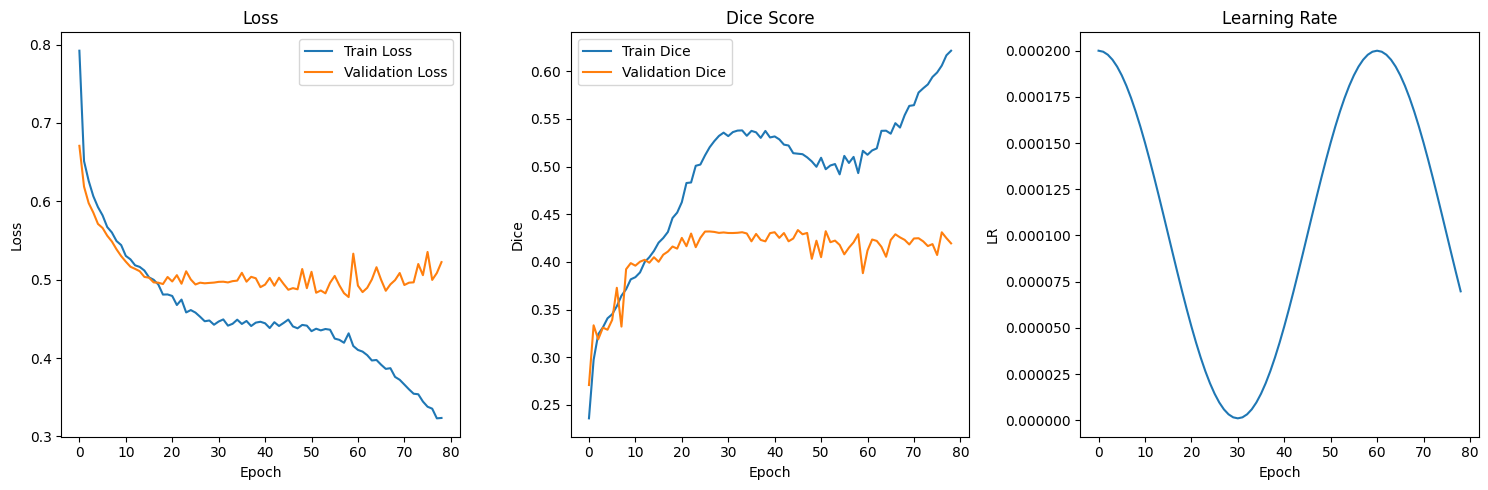

In [9]:
# Plot metrics
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot([np.mean(d) for d in train_dice_scores], label='Train Dice')
plt.plot([np.mean(d) for d in val_dice_scores], label='Validation Dice')
plt.title('Dice Score')
plt.xlabel('Epoch')
plt.ylabel('Dice')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(learning_rates)
plt.title('Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('LR')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'training_metrics.png'))
plt.show()

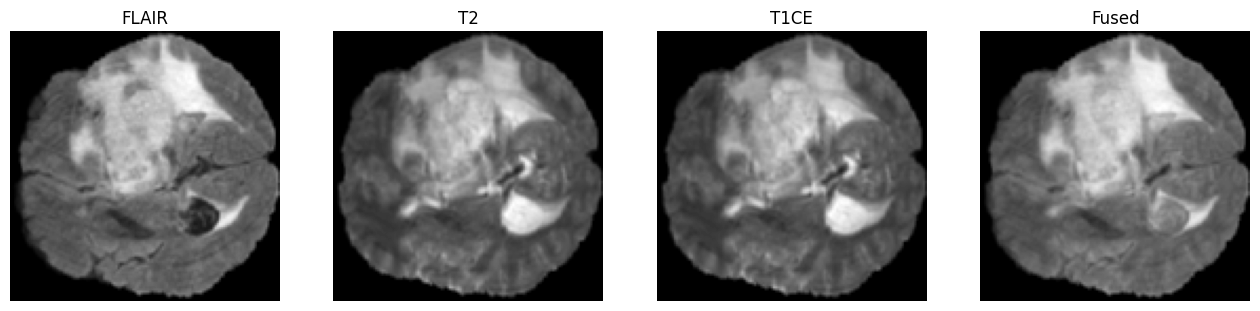

Metrics for BraTS20_Training_001:
MSE: 0.0060
PSNR: 22.2055
SSIM: 0.9339
Entropy: 13.3184
MI: 1.3798



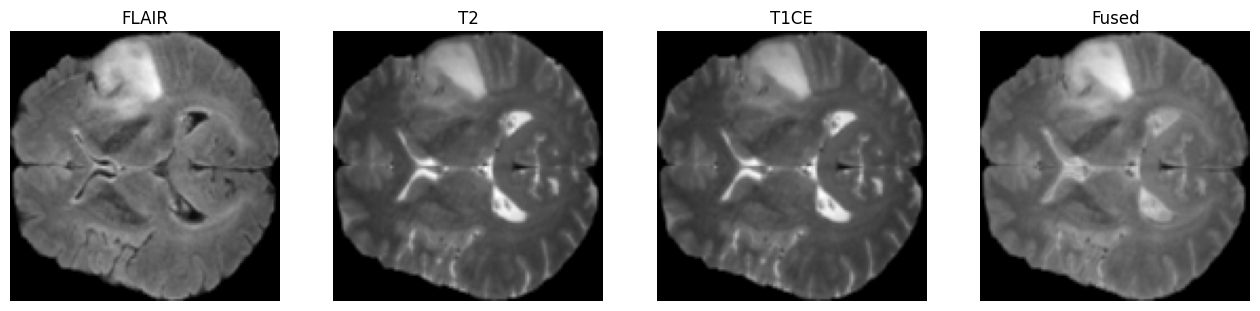

Metrics for BraTS20_Training_002:
MSE: 0.0025
PSNR: 26.0919
SSIM: 0.9725
Entropy: 12.8947
MI: 1.3774



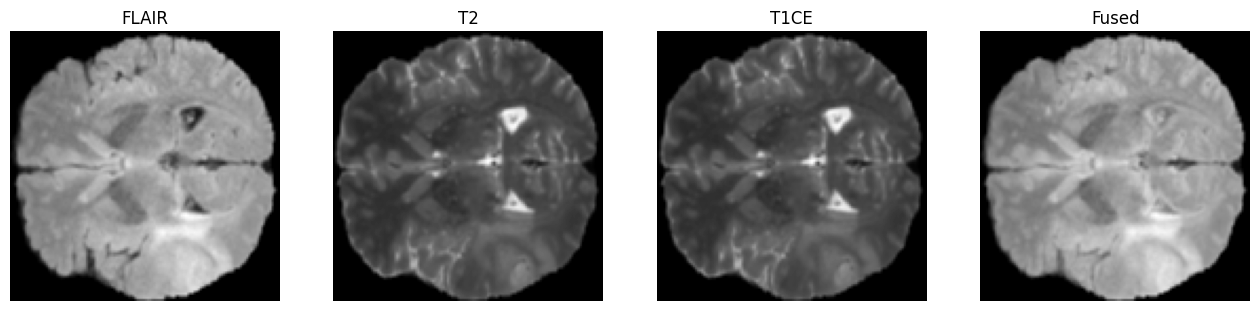

Metrics for BraTS20_Training_003:
MSE: 0.0238
PSNR: 16.2390
SSIM: 0.8291
Entropy: 13.2870
MI: 1.2502



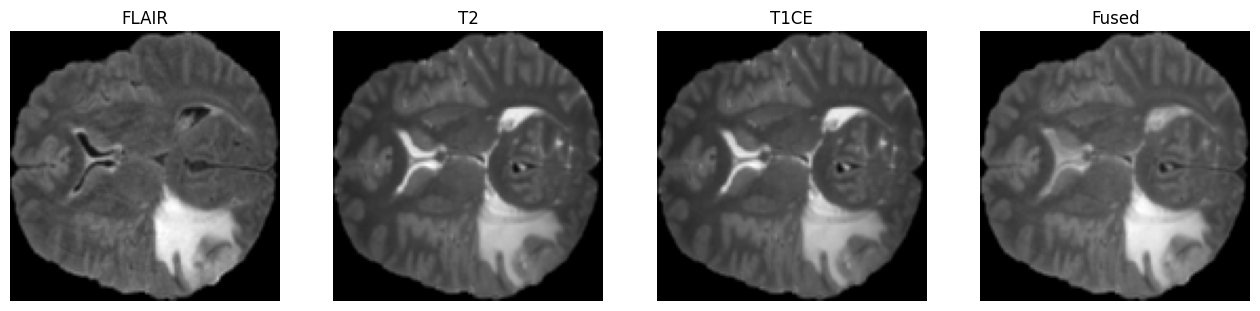

Metrics for BraTS20_Training_004:
MSE: 0.0023
PSNR: 26.3574
SSIM: 0.9759
Entropy: 13.3583
MI: 1.5042



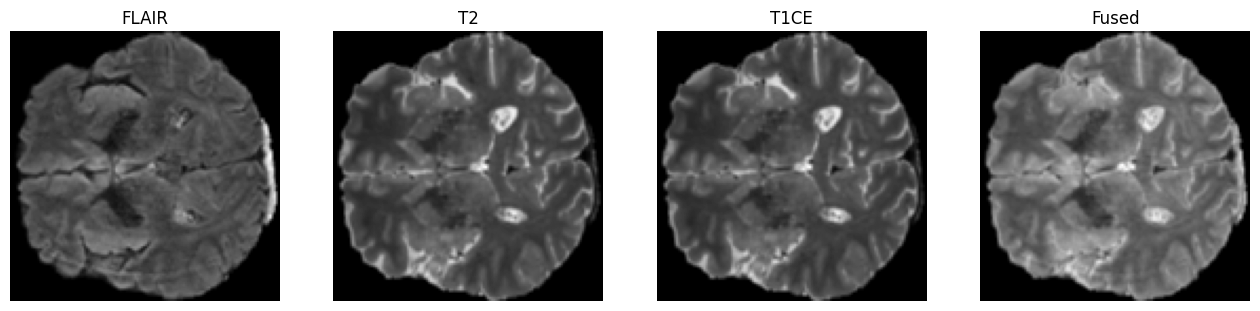

Metrics for BraTS20_Training_005:
MSE: 0.0057
PSNR: 22.4595
SSIM: 0.9489
Entropy: 13.2019
MI: 1.2021

Fused 369 patients successfully


In [4]:
# import os
# import random
# import numpy as np
# import nibabel as nib
# import pandas as pd
# import matplotlib.pyplot as plt
# import shutil  # Added for directory deletion
# from sklearn.decomposition import PCA
# from skimage.transform import pyramid_gaussian, resize
# from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
# from skimage.measure import shannon_entropy
# from monai.transforms import Compose, LoadImaged, EnsureChannelFirstd, ToTensord
# from monai.data import Dataset, DataLoader

# # مسارات البيانات
# processed_dir = "/kaggle/working/processed"
# output_dir = "/kaggle/working/fused"
# os.makedirs(output_dir, exist_ok=True)

# # قايمة الحالات
# patient_list = sorted([d for d in os.listdir(processed_dir) if os.path.isdir(os.path.join(processed_dir, d))])

# # إنشاء فولدرات لكل مريض
# for patient in patient_list:
#     os.makedirs(os.path.join(output_dir, patient), exist_ok=True)

# # إعداد قايمة البيانات
# data_dicts = []
# skipped_patients = []
# for patient in patient_list:
#     flair_path = os.path.join(processed_dir, patient, "flair.nii.gz")
#     t2_path = os.path.join(processed_dir, patient, "t2.nii.gz")
#     t1ce_path = os.path.join(processed_dir, patient, "t1ce.nii.gz")
#     try:
#         if not (os.path.exists(flair_path) and os.path.exists(t2_path) and os.path.exists(t1ce_path)):
#             skipped_patients.append((patient, "Missing file(s)"))
#             continue
#         nib.load(flair_path)
#         nib.load(t2_path)
#         nib.load(t1ce_path)
#         data_dicts.append({
#             "flair": flair_path,
#             "t2": t2_path,
#             "t1ce": t1ce_path,
#         })
#     except Exception as e:
#         skipped_patients.append((patient, f"Failed to load files: {str(e)}"))
#         continue

# # تعريف التحويلات
# transforms = Compose([
#     LoadImaged(keys=["flair", "t2", "t1ce"]),
#     EnsureChannelFirstd(keys=["flair", "t2", "t1ce"]),
#     ToTensord(keys=["flair", "t2", "t1ce"])
# ])

# # إعداد الداتاسيت والـ DataLoader
# dataset = Dataset(data=data_dicts, transform=transforms)
# dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=2)

# # دالة التطبيع
# def normalize(image):
#     return (image - image.min()) / (image.max() - image.min() + 1e-6)

# # دالة Laplacian Pyramid للـ 3D
# def apply_laplacian_pyramid_3d(img, levels=4):
#     output = np.zeros_like(img)
#     for z in range(img.shape[2]):
#         slice_2d = img[:, :, z]
#         gaussian = list(pyramid_gaussian(slice_2d, max_layer=levels))
#         laplacian = []
#         for i in range(len(gaussian) - 1):
#             next_level = gaussian[i + 1]
#             target_shape = gaussian[i].shape
#             upsampled = resize(next_level, target_shape, anti_aliasing=True)
#             lap = gaussian[i] - upsampled
#             laplacian.append(lap)
#         laplacian.append(gaussian[-1])
#         reconstructed = laplacian[-1]
#         for i in range(len(laplacian) - 2, -1, -1):
#             reconstructed = resize(reconstructed, laplacian[i].shape, anti_aliasing=True) + laplacian[i]
#         output[:, :, z] = reconstructed
#     return output

# # دالة لحساب Mutual Information
# def mutual_information(hgram):
#     pxy = hgram / float(np.sum(hgram))
#     px = np.sum(pxy, axis=1)
#     py = np.sum(pxy, axis=0)
#     px_py = px[:, None] * py[None, :]
#     nzs = pxy > 0
#     return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

# def get_histogram(img1, img2, bins=100):
#     hist_2d, _, _ = np.histogram2d(img1.ravel(), img2.ravel(), bins=bins)
#     return hist_2d

# # دالة لحساب الـ Metrics
# def calculate_metrics(fused_img, flair_img, t2_img, t1ce_img):
#     ref_img = (flair_img + t2_img + t1ce_img) / 3
#     mse_value = mean_squared_error(fused_img, ref_img)
#     psnr_value = peak_signal_noise_ratio(fused_img, ref_img, data_range=1.0)
    
#     ssim_values = [
#         structural_similarity(fused_img[:, :, i], ref_img[:, :, i], data_range=1.0)
#         for i in range(fused_img.shape[2])
#     ]
#     ssim_mean = np.mean(ssim_values)
    
#     entropy_values = [
#         shannon_entropy(fused_img[:, :, i])
#         for i in range(fused_img.shape[2])
#     ]
#     entropy_mean = np.mean(entropy_values)
    
#     hist_f_flair = get_histogram(fused_img, flair_img)
#     hist_f_t2 = get_histogram(fused_img, t2_img)
#     hist_f_t1ce = get_histogram(fused_img, t1ce_img)
#     mi_flair = mutual_information(hist_f_flair)
#     mi_t2 = mutual_information(hist_f_t2)
#     mi_t1ce = mutual_information(hist_f_t1ce)
#     mi_value = (mi_flair + mi_t2 + mi_t1ce) / 3
    
#     return {
#         "MSE": mse_value,
#         "PSNR": psnr_value,
#         "SSIM": ssim_mean,
#         "Entropy": entropy_mean,
#         "MI": mi_value
#     }

# # معالجة ودمج الصور
# processed_count = 0
# display_patients = patient_list[:5]  # 5 بيشنت للعرض
# display_images = []
# metrics_list = []

# for i, data in enumerate(dataloader):
#     if i >= len(data_dicts):
#         break
#     patient_id = data_dicts[i]["flair"].split("/")[-2]  # استخراج patient_id من المسار
    
#     flair, t2, t1ce = data["flair"][0], data["t2"][0], data["t1ce"][0]
    
#     # تحويل إلى NumPy وتطبيع
#     flair_np = normalize(flair.numpy().squeeze())
#     t2_np = normalize(t2.numpy().squeeze())
#     t1ce_np = normalize(t1ce.numpy().squeeze())
    
#     # فحص الأبعاد
#     expected_shape = (128, 128, 96)
#     if flair_np.shape != expected_shape:
#         print(f"Warning: {patient_id} FLAIR has unexpected shape {flair_np.shape}")
#     if t2_np.shape != expected_shape:
#         print(f"Warning: {patient_id} T2 has unexpected shape {t2_np.shape}")
#     if t1ce_np.shape != expected_shape:
#         print(f"Warning: {patient_id} T1CE has unexpected shape {t1ce_np.shape}")
    
#     # Weighted Averaging (T1CE + T2)
#     w1, w2 = 0.6, 0.4
#     fused_t1ce_t2 = w1 * t1ce_np + w2 * t2_np
    
#     # PCA (fused_t1ce_t2 + FLAIR)
#     fused_flat = fused_t1ce_t2.flatten().reshape(-1, 1)
#     flair_flat = flair_np.flatten().reshape(-1, 1)
#     data = np.hstack((fused_flat, flair_flat))
#     pca = PCA(n_components=1)
#     fused_pca = pca.fit_transform(data)
#     fused_pca = fused_pca.reshape(fused_t1ce_t2.shape)
#     fused_pca = normalize(fused_pca)
    
#     # Laplacian Pyramid
#     fused_final = apply_laplacian_pyramid_3d(fused_pca)
#     fused_final = normalize(fused_final)
    
#     # فحص أبعاد الصورة المدمجة
#     if fused_final.shape != expected_shape:
#         print(f"Warning032: {patient_id} fused image has unexpected shape {fused_final.shape}")
    
#     # حساب الـ Metrics
#     metrics = calculate_metrics(fused_final, flair_np, t2_np, t1ce_np)
#     metrics["Patient_ID"] = patient_id
#     metrics_list.append(metrics)
    
#     # حفظ الصورة المدمجة
#     patient_output_dir = os.path.join(output_dir, patient_id)
#     output_path = os.path.join(patient_output_dir, f"{patient_id}_fused.nii.gz")
#     nii_img = nib.Nifti1Image(fused_final, affine=np.eye(4))
#     nib.save(nii_img, output_path)
    
#     # تخزين الصور للعرض
#     if patient_id in display_patients:
#         display_images.append({
#             "patient_id": patient_id,
#             "flair": flair_np[:, :, 48],
#             "t2": t2_np[:, :, 48],
#             "t1ce": t1ce_np[:, :, 48],
#             "fused": fused_final[:, :, 48],
#             "metrics": metrics
#         })
    
#     processed_count += 1

# # عرض الصور والـ Metrics لـ 5 بيشنت
# for patient_data in display_images:
#     fig, axes = plt.subplots(1, 4, figsize=(16, 4))
#     axes[0].imshow(patient_data["flair"], cmap="gray")
#     axes[0].set_title("FLAIR")
#     axes[0].axis("off")
#     axes[1].imshow(patient_data["t2"], cmap="gray")
#     axes[1].set_title("T2")
#     axes[1].axis("off")
#     axes[2].imshow(patient_data["t1ce"], cmap="gray")
#     axes[2].set_title("T1CE")
#     axes[2].axis("off")
#     axes[3].imshow(patient_data["fused"], cmap="gray")
#     axes[3].set_title("Fused")
#     axes[3].axis("off")
#     plt.show()
    
#     print(f"Metrics for {patient_data['patient_id']}:")
#     for key, value in patient_data["metrics"].items():
#         if key != "Patient_ID":
#             print(f"{key}: {value:.4f}")
#     print()

# # حفظ الـ Metrics في CSV
# metrics_df = pd.DataFrame(metrics_list)
# metrics_df.to_csv("/kaggle/working/fusion_metrics.csv", index=False)

# # طباعة النتائج
# print(f"Fused {processed_count} patients successfully")
# if skipped_patients:
#     print("Skipped patients:")
#     for patient, reason in skipped_patients:
#         print(f"Patient {patient}: {reason}")
# if processed_count < len(patient_list):
#     print(f"Warning: Expected to fuse {len(patient_list)} patients, but only fused {processed_count}")